# 1d3v GEMPIC electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold fluid electrons and hot kinetic electrons reads

\begin{align}
\frac{\partial \textbf{j}_\text{c}}{\partial t} = \epsilon_0\Omega_{\text{pe}}^2\textbf{E} + \Omega_\text{ce}\textbf{j}_\text{c}\times\textbf{e}_z,  \\
\frac{1}{c^2}\frac{\partial \textbf{E}}{\partial t} = \nabla\times\textbf{B} - \mu_0(\textbf{j}_\text{c} + \textbf{j}_\text{h}), \\
\frac{\partial \textbf{B}}{\partial t}=-\nabla\times\textbf{E}, \\
\frac{\partial f_\text{h}}{\partial t} + \textbf{v}\cdot\nabla f_\text{h} + \frac{q}{m}(\textbf{E}+\textbf{v}\times\textbf{B})\cdot\nabla_v f_\text{h}=0, \\
\textbf{j}_\text{h} = q\int\text{d}^3\textbf{v}\,\textbf{v}f_\text{h}.
\end{align}

where $\Omega_\text{ce}=\frac{q B_0}{m}$ is the signed cyclotron frequency and $\Omega_{\text{pe}}^2=\frac{n_\text{c}e^2}{\epsilon_0 m}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

The first three equations are written in the compact form 

\begin{align}
\partial_t \textbf{U}+A_1\partial_z \textbf{U}+A_2\textbf{U}=\textbf{F},\label{system_of_equations}
\end{align}

for the electromagnetic fields $\textbf{E},\textbf{B}$ and the cold current density $\textbf{j}$, i.e. $\textbf{U}=(E_x,E_y,B_x,B_y,j_{\text{c}x},j_{\text{c}y})$. The z-components do not appear because they correspond to electrostatic waves which are not considered in this work. The matrices are

\begin{align}
A_1=
\begin{pmatrix}
0 &0  &0 &c^2  &0 &0 \\
0 &0  &-c^2 &0 &0 &0 \\
0 &-1  &0 &0 &0 &0  \\
1 &0  &0 &0 &0 &0  \\
0 &0  &0 &0 &0 &0   \\
0 &0  &0 &0 &0 &0 
\end{pmatrix}
\end{align}

and 

\begin{align}
A_2=
\begin{pmatrix}
0 &0 &0 &0 &\mu_0c^2 &0 \\
0 &0 &0 &0 &0 &\mu_0c^2 \\
0 &0 &0 &0 &0 &0 \\
0 &0 &0 &0 &0 &0 \\
-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &0 &0 &-\Omega_{\text{ce}} \\
0 &-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &\Omega_{\text{ce}} &0 \\
\end{pmatrix}
\end{align}

with $\Omega_{\text{ce}}=-\frac{eB_0}{m}<0$ for electrons. The inhomogeneity is 

\begin{align}
\textbf{F}=
\begin{pmatrix}
-\mu_0c^2 j_{\text{h}x} \\
-\mu_0c^2 j_{\text{h}y} \\
0 \\
0 \\
0 \\
0
\end{pmatrix}.
\end{align}

## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for an arbitrary equilibrium distribution function $f^0=f^0(v_\parallel,v_\bot)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\text{d}^3\textbf{v}\frac{v_\bot}{2}\frac{\hat{G}f_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}=0.
\end{align}

Here $\nu_\text{h}=n_\text{h}/n_\text{c}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
f^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=D_{\text{cold,R/L}}(k,\omega)+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $Z$ is the plasma dispersion function and 

\begin{align}
\xi^{\pm} = \frac{\omega\pm\Omega_\text{ce}}{k\sqrt{2}w_\parallel}.
\end{align}

## 3 Discretization of the 1D cold plasma test case
As a first test case we neglect the energetic particles and study the parallel propagation of electromagnetic waves in a cold magnetized plasma. Again, we assume the domain to be $\Omega = (a,b)$ and suppose periodic boundary conditions for all quantities. In order to obtain a weak formulation of (\ref{system_of_equations}) we multiply by test functions $F_x$, $F_y$, $C_x$, $C_y$, $O_x$ and $O_y$ and integrate over $\Omega$:

\begin{align}
    &\int_a^b\frac{\partial E_x}{\partial t}F_x\mathrm{d}z+c^2\int_a^b\frac{\partial B_y}{\partial z}F_x\mathrm{d}z+\mu_0c^2\int_a^bj_xF_x\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial E_y}{\partial t}F_y\mathrm{d}z-c^2\int_a^b\frac{\partial B_x}{\partial z}F_y\mathrm{d}z+\mu_0c^2\int_a^bj_yF_y\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial B_x}{\partial t}C_x\mathrm{d}z-\int_a^b\frac{\partial E_y}{\partial z}C_x\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial B_y}{\partial t}C_y\mathrm{d}z+\int_a^b\frac{\partial E_x}{\partial z}C_y\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial j_x}{\partial t}O_x\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_xO_x\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_yO_x\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial j_y}{\partial t}O_y\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_yO_y\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_xO_y\mathrm{d}z=0.
\end{align}

We choose the following formulation: find $(E_x,E_y,B_x,B_y,j_x,j_y) \in \tilde{H}^1\times\tilde{H}^1\times\tilde{L}^2\times\tilde{L}^2\times\tilde{H}^1\times\tilde{H}^1$ such that

\begin{align}
&\int_a^b\frac{\partial E_x}{\partial t}F_x\mathrm{d}z-c^2\int_a^bB_y\frac{\partial F_x}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_xF_x\mathrm{d}z=0 &&\forall F_x\in \tilde{H}^1,\\
    &\int_a^b\frac{\partial E_y}{\partial t}F_y\mathrm{d}z+c^2\int_a^bB_x\frac{\partial F_y}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_yF_y\mathrm{d}z=0 &&\forall F_y\in \tilde{H}^1,\\
    &\int_a^b\frac{\partial B_x}{\partial t}C_x\mathrm{d}z-\int_a^b\frac{\partial E_y}{\partial z}C_x\mathrm{d}z=0 &&\forall C_x\in \tilde{L}^2,\\
    &\int_a^b\frac{\partial B_y}{\partial t}C_y\mathrm{d}z+\int_a^b\frac{\partial E_x}{\partial z}C_y\mathrm{d}z=0 &&\forall C_x\in \tilde{L}^2,\\
    &\int_a^b\frac{\partial j_x}{\partial t}O_x\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_xO_x\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_yO_x\mathrm{d}z=0 &&\forall O_x\in \tilde{H}^1,\\
    &\int_a^b\frac{\partial j_y}{\partial t}O_y\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_yO_y\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_xO_y\mathrm{d}z=0 &&\forall O_y\in \tilde{H}^1.
\end{align}

In the first two equations (x- and y-component of Ampère's law) we have integrated by parts in order to obtain a well defined weak formulation. 

### 3.1 Space discretization

As a next step, the spaces $\tilde{H}^1$ and $\tilde{L}^2$ are replaced by finite-dimensional subspaces $\tilde{V}_0\subset\tilde{H}^1$ and $\tilde{V}_1\subset\tilde{L}^2$ with $\mathrm{dim}\tilde{V}_0=N_0<\infty$ and $\mathrm{dim}\tilde{V}_1=N_1<\infty$. The basis functions will be denoted by $(\tilde{\varphi}^0_i)_{1\leq i\leq N_0}$ and $(\tilde{\varphi}^1_{i+1/2})_{0\leq i\leq N_1-1}$, respectively. The discrete version then reads: find $(E_{x,h},E_{y,h},B_{x,h},B_{y,h},j_{x,h},j_{y,h}) \in \tilde{V}_0\times\tilde{V}_0\times\tilde{V}_1\times\tilde{V}_1\times\tilde{V}_0\times\tilde{V}_0$ such that 

\begin{align}
&\int_a^b\frac{\partial E_{x,h}}{\partial t}F_{x,h}\mathrm{d}z-c^2\int_a^bB_{y,h}\frac{\partial F_{x,h}}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_{x,h}F_{x,h}\mathrm{d}z=0 &&\forall F_{x,h}\in \tilde{V}_0,\\
    &\int_a^b\frac{\partial E_{y,h}}{\partial t}F_{y,h}\mathrm{d}z+c^2\int_a^bB_{x,h}\frac{\partial F_{y,h}}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_{y,h}F_{y,h}\mathrm{d}z=0 &&\forall F_{y,h}\in \tilde{V}_0,\\
    &\int_a^b\frac{\partial B_{x,h}}{\partial t}C_{x,h}\mathrm{d}z-\int_a^b\frac{\partial E_{y,h}}{\partial z}C_{x,h}\mathrm{d}z=0 &&\forall C_{x,h}\in \tilde{V}_1,\\
    &\int_a^b\frac{\partial B_{y,h}}{\partial t}C_{y,h}\mathrm{d}z+\int_a^b\frac{\partial E_{x,h}}{\partial z}C_{y,h}\mathrm{d}z=0 &&\forall C_{x,h}\in \tilde{V}_1,\\
    &\int_a^b\frac{\partial j_{x,h}}{\partial t}O_{x,h}\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_{x,h}O_{x,h}\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_{y,h}O_{x,h}\mathrm{d}z=0 &&\forall O_{x,h}\in \tilde{V}_0,\\
    &\int_a^b\frac{\partial j_{y,h}}{\partial t}O_{y,h}\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_{y,h}O_{y,h}\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_{x,h}O_{y,h}\mathrm{d}z=0 &&\forall O_{y,h}\in \tilde{V}_0.
\end{align}

A first important step is to define the mesh over the domain $\Omega = (a,b)$. The domain will be split into $N_\mathrm{el}$ elements, denoted $\Omega_k$, such that $\Omega = \cup_{k = 1}^{N_\mathrm{el}} \Omega_k$ and $\Omega_k \cap \Omega_{k+1} = c_k$, where $(c_k)_{1\leq k\leq N_\mathrm{el}-1}$ denote the element interfaces (or boundaries). The domain boundaries are denoted by $c_0 = a$ and $c_{N_\mathrm{el}} = b$.
Furthermore, we choose as basis functions for $\tilde{V}_0$ the Lagrange interpolation polynomials (LIPs) and for $\tilde{V}_1$ the Lagrange histopolation polynomials (LHPs) which are linear combinations of first order derviatives of LIPs. It can be shown that this particular choose satisfy a commuting diagram of the follwing form:

<img src="pics/deRham1D.png" width="220"/>

Expanding all functions in its respective basis yields the following semidiscrete model for the Finite Element coefficients $\textbf{e}_x,\textbf{e}_y,\textbf{b}_x,\textbf{b}_y,\textbf{y}_x,\textbf{y}_y$:

\begin{align}
    &\mathbb{M}^0\frac{\mathrm{d}\textbf{e}_x}{\mathrm{d} t}=c^2\tilde{\mathbb{G}}^\top\mathbb{M}^1\textbf{b}_y-\mu_0c^2\mathbb{M}^0\textbf{y}_x, \label{semi1}\\
    &\mathbb{M}^0\frac{\mathrm{d}\textbf{e}_y}{\mathrm{d} t}=-c^2\tilde{\mathbb{G}}^\top\mathbb{M}^1\textbf{b}_x-\mu_0c^2\mathbb{M}^0\textbf{y}_y, \\
    &\frac{\mathrm{d}\textbf{b}_x}{\mathrm{d} t}=\tilde{\mathbb{G}}\textbf{e}_y, \\
    &\frac{\mathrm{d}\textbf{b}_y}{\mathrm{d} t}=-\tilde{\mathbb{G}}\textbf{e}_x, \\
    &\frac{\mathrm{d}\textbf{y}_x}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_x+\Omega_\text{ce}\textbf{y}_y, \\
    &\frac{\mathrm{d}\textbf{y}_y}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_y-\Omega_\text{ce}\textbf{y}_x, \label{semi6}\\
\end{align}

where we introduced the gradient matrix

\begin{align}
\tilde{\mathbb{G}} :=\frac{2}{\Delta z} \begin{pmatrix}
 -1 & 1  &  &  &  
 \\
  & -1 & 1 & &   
 \\
  &  & \ddots & \ddots &  
 \\
  &  &   & -1 & 1 
 \\
  1 &  &  &    & -1  
 \end{pmatrix}.
\end{align}

An important property of the system (\ref{semi1})-(\ref{semi6}) is that in can be written in a Poisson structure:

\begin{aligned}
 \underbrace{\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix}
 \textbf{e}_x 
 \\
 \textbf{e}_y
 \\
 \textbf{b}_x
 \\
 \textbf{b}_y
 \\
 \textbf{y}_x
 \\
 \textbf{y}_y
 \end{pmatrix}}_{\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}} = \underbrace{\begin{pmatrix}
 & & &\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top & -\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} &
 \\
 & & -\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top & & & -\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}
 \\
 & \frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1} & & & &
 \\
 -\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}& & & & &
 \\
  \Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & & & & \epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}
 \\
 & \Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & & -\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1} &
 \end{pmatrix}}_{= \mathbb{J}(\textbf{u})} \underbrace{\begin{pmatrix}
 \epsilon_0\mathbb{M}_0\textbf{e}_x
 \\
 \epsilon_0\mathbb{M}_0\textbf{e}_y
 \\
 1/\mu_0\mathbb{M}_1\textbf{b}_x
 \\
 1/\mu_0\mathbb{M}_1\textbf{b}_y
 \\
 1/(\epsilon_0\Omega_\mathrm{pe}^2)\mathbb{M}_0\textbf{y}_x
 \\
 1/(\epsilon_0\Omega_\mathrm{pe}^2)\mathbb{M}_0\textbf{y}_y
 \end{pmatrix}}_{=\nabla_{\textbf{u}} H(\textbf{u})}
\end{aligned}

where $\mathbb{J}\in\mathbb{R}^{4N_0+2N_1}$ is the Poisson matrix and 

\begin{align}
H=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y)+\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y)+\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y)
\end{align}

is the Hamiltonian of the system.

### 3.2 Time discretization

#### Hamiltonian splitting

In Hamiltonian splitting, the idea is to keep the full Poisson structure $\mathbb{J}(\textbf{u})$ is each step but split the Hamiltonian. If one can solve each sub-step analytically this yields Poisson integrators, and the composition of Poisson integrators again yields a Poisson integrator. For example, we could split $H$ as

\begin{align}
H = H_E + H_B +H_Y
\end{align},

where

\begin{align}
    &H_E=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y), \\
    &H_B=\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y), \\
    &H_Y=\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y). 
\end{align}

This leads to the following sub problems:

__Problem 1.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_E(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n + (t-t_n)\tilde{\mathbb{G}}\textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n - (t-t_n)\tilde{\mathbb{G}}\textbf{e}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n + (t-t_n)\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n + (t-t_n)\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_y^n,\\[1mm]
\end{align}

__Problem 2.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_B(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\frac{1}{\mu_0}\mathbb{M}_1\textbf{b}_y &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n + (t-t_n)c^2\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\mathbb{M}_1\textbf{b}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\frac{1}{\mu_0}\mathbb{M}_1\textbf{b}_x &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - (t-t_n)c^2\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\mathbb{M}_1\textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n,\\[1mm]
\end{align}

__Problem 3.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_Y(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_x &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n - \frac{1}{\epsilon_0}\int_{t_n}^t y_x(t^\prime)\mathrm{d}t^\prime=\textbf{e}_x^n - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{y}_x^n\sin(\Omega_\textbf{ce}t)-\textbf{y}_y^n\cos(\Omega_\textbf{ce}t)+\textbf{y}_y^n],\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_y &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - \frac{1}{\epsilon_0}\int_{t_n}^t y_y(t^\prime)\mathrm{d}t^\prime=\textbf{e}_y^n - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{y}_y^n\sin(\Omega_\textbf{ce}t)+\textbf{y}_x^n\cos(\Omega_\textbf{ce}t)-\textbf{y}_x^n],\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_y &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n\cos(\Omega_\textbf{ce}t)+\textbf{y}_y^n\sin(\Omega_\textbf{ce}t),\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=-\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_x &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n\cos(\Omega_\textbf{ce}t)-\textbf{y}_x^n\sin(\Omega_\textbf{ce}t),\\[1mm]
\end{align}

## 4. Discretization of the 1D hybrid test case (with energetic electrons)
### 4.1 Space discretization

This time we discretize the full hybrid model with a current coming from energetic electrons. The semi-discrete system reads

\begin{align}
    &\mathbb{M}^0\frac{\mathrm{d}\textbf{e}_x}{\mathrm{d} t}=c^2\tilde{\mathbb{G}}^\top\mathbb{M}^1\textbf{b}_y-\mu_0c^2\mathbb{M}^0\textbf{y}_x-\mu_0c^2q\mathbb{Q}^0\mathbb{W}\textbf{V}_x, \label{semi1}\\
    &\mathbb{M}^0\frac{\mathrm{d}\textbf{e}_y}{\mathrm{d} t}=-c^2\tilde{\mathbb{G}}^\top\mathbb{M}^1\textbf{b}_x-\mu_0c^2\mathbb{M}^0\textbf{y}_y-\mu_0c^2q\mathbb{Q}^0\mathbb{W}\textbf{V}_y, \\
    &\frac{\mathrm{d}\textbf{b}_x}{\mathrm{d} t}=\tilde{\mathbb{G}}\textbf{e}_y, \\
    &\frac{\mathrm{d}\textbf{b}_y}{\mathrm{d} t}=-\tilde{\mathbb{G}}\textbf{e}_x, \\
    &\frac{\mathrm{d}\textbf{y}_x}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_x+\Omega_\text{ce}\textbf{y}_y, \\
    &\frac{\mathrm{d}\textbf{y}_y}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_y-\Omega_\text{ce}\textbf{y}_x, \label{semi6}\\
    &\frac{\mathrm{d}\textbf{Z}}{\mathrm{d} t}=\textbf{V}_z, \label{semi7}\\
    &\frac{\mathrm{d}\textbf{V}_x}{\mathrm{d} t}=\frac{q}{m}[(\mathbb{Q}^0)^\top\textbf{e}_x-\mathbb{B}_y\textbf{V}_z+B_0\textbf{V}_y], \label{semi8}\\
    &\frac{\mathrm{d}\textbf{V}_y}{\mathrm{d} t}=\frac{q}{m}[(\mathbb{Q}^0)^\top\textbf{e}_y+\mathbb{B}_x\textbf{V}_z-B_0\textbf{V}_x], \label{semi9}\\
    &\frac{\mathrm{d}\textbf{V}_z}{\mathrm{d} t}=\frac{q}{m}[\mathbb{B}_y\textbf{V}_x-\mathbb{B}_x\textbf{V}_y], \label{semi10},
\end{align}

where,

\begin{align}
    &(\mathbb{Q}^0)_{ip}=\tilde{\varphi}_i^0(z_p),\\
    &(\mathbb{Q}^1)_{ip}=\tilde{\varphi}_{i+1/2}^1(z_p),\\
    &\mathbb{B}_{x/y}=\text{diag}((\mathbb{Q}^1)^\top\textbf{b}_{x/y})
\end{align}

An important property of the system (\ref{semi1})-(\ref{semi10}) is that in can be written in a Poisson structure:

\begin{aligned}
 \underbrace{\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix}
 \textbf{e}_x 
 \\
 \textbf{e}_y
 \\
 \textbf{b}_x
 \\
 \textbf{b}_y
 \\
 \textbf{y}_x
 \\
 \textbf{y}_y
 \\
 \textbf{Z}
 \\
 \textbf{V}_x
 \\
 \textbf{V}_y
 \\
 \textbf{V}_z
 \end{pmatrix}}_{\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}} = \begin{pmatrix}
 & & &\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top & -\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & &-\frac{q}{\epsilon_0m}\mathbb{M}_0^{-1}\mathbb{Q}^0 & &
 \\
 & & -\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top & & & -\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & &-\frac{q}{\epsilon_0m}\mathbb{M}_0^{-1}\mathbb{Q}^0 &
 \\
 & \frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1} & & & & & & & &
 \\
 -\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1} & & & & & & & & &
 \\
  \Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & & & & \epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1} & & & &
 \\
 & \Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & & -\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1} & & & & &
 \\
 & & & & & & & & &\frac{1}{m}\mathbb{W}^{-1}
 \\
 \frac{q}{\epsilon_0m}(\mathbb{Q}^0)^\top\mathbb{M}_0^{-1} & & & & & & & &\frac{1}{m}\Omega_\mathrm{ce}\mathbb{W}^{-1} &-\frac{q}{m^2}\mathbb{B}_y\mathbb{W}^{-1}
 \\
 &\frac{q}{\epsilon_0m}(\mathbb{Q}^0)^\top\mathbb{M}_0^{-1}  & & & & & & -\frac{1}{m}\Omega_\mathrm{ce}\mathbb{W}^{-1} & &\frac{q}{m^2}\mathbb{B}_x\mathbb{W}^{-1}
 \\
 & & & & & &-\frac{1}{m}\mathbb{W}^{-1} &\frac{q}{m^2}\mathbb{B}_y\mathbb{W}^{-1} &-\frac{q}{m^2}\mathbb{B}_x\mathbb{W}^{-1} &
 \end{pmatrix} \underbrace{\begin{pmatrix}
 \epsilon_0\mathbb{M}_0\textbf{e}_x
 \\
 \epsilon_0\mathbb{M}_0\textbf{e}_y
 \\
 1/\mu_0\mathbb{M}_1\textbf{b}_x
 \\
 1/\mu_0\mathbb{M}_1\textbf{b}_y
 \\
 1/(\epsilon_0\Omega_\mathrm{pe}^2)\mathbb{M}_0\textbf{y}_x
 \\
 1/(\epsilon_0\Omega_\mathrm{pe}^2)\mathbb{M}_0\textbf{y}_y
 \\
 0
 \\
 m\mathbb{W}\textbf{V}_x
 \\
 m\mathbb{W}\textbf{V}_y
 \\
 m\mathbb{W}\textbf{V}_z
 \end{pmatrix}}_{=\nabla_{\textbf{u}} H(\textbf{u})}
\end{aligned}

where $\mathbb{J}\in\mathbb{R}^{4N_0+2N_1+4N_p}$ is the Poisson matrix and 

\begin{align}
H=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y)+\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y)+\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y)+\frac{m}{2}\textbf{V}_x^\top\mathbb{W}\textbf{V}_x+\frac{m}{2}\textbf{V}_y^\top\mathbb{W}\textbf{V}_y+\frac{m}{2}\textbf{V}_z^\top\mathbb{W}\textbf{V}_z
\end{align}

is the Hamiltonian of the system.

### 4.2 Time discretization

#### Hamiltonian splitting

In Hamiltonian splitting, the idea is to keep the full Poisson structure $\mathbb{J}(\textbf{u})$ is each step but split the Hamiltonian. If one can solve each sub-step analytically this yields Poisson integrators, and the composition of Poisson integrators again yields a Poisson integrator. For example, we could split $H$ as

\begin{align}
H = H_E + H_B + H_Y + H_x + H_y + H_z
\end{align},

where

\begin{align}
    &H_E=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y), \\
    &H_B=\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y), \\
    &H_Y=\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y), \\
    &H_x = \frac{m}{2}\textbf{V}_x^\top\mathbb{W}\textbf{V}_x, \\
    &H_y = \frac{m}{2}\textbf{V}_y^\top\mathbb{W}\textbf{V}_y, \\
    &H_z = \frac{m}{2}\textbf{V}_z^\top\mathbb{W}\textbf{V}_z.
\end{align}

This leads to the following sub problems:

__Problem 1.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_E(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n + (t-t_n)\tilde{\mathbb{G}}\textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n - (t-t_n)\tilde{\mathbb{G}}\textbf{e}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n + (t-t_n)\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n + (t-t_n)\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{Z}(t) = \textbf{Z}^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=\frac{q}{\epsilon_0m}(\mathbb{Q}^0)^\top\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{V}_x(t) = \textbf{V}_x^n + (t-t_n)\frac{q}{m}(\mathbb{Q}^0)^\top(\textbf{Z}^n)\textbf{e}_x^n,\\[1mm] 
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=\frac{q}{\epsilon_0m}(\mathbb{Q}^0)^\top\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{V}_y(t) = \textbf{V}_x^n + (t-t_n)\frac{q}{m}(\mathbb{Q}^0)^\top(\textbf{Z}^n)\textbf{e}_y^n,\\[1mm] 
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_z(t) = \textbf{V}_z^n,\\[1mm]
\end{align}

__Problem 2.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_B(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\frac{1}{\mu_0}\mathbb{M}_1\textbf{b}_y &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n + (t-t_n)c^2\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\mathbb{M}_1\textbf{b}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\frac{1}{\mu_0}\mathbb{M}_1\textbf{b}_x &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - (t-t_n)c^2\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\mathbb{M}_1\textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{Z}(t) = \textbf{Z}^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_x(t) = \textbf{V}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_y(t) = \textbf{V}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_z(t) = \textbf{V}_z^n,\\[1mm]
\end{align}
    
__Problem 3.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_Y(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_x &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n - \frac{1}{\epsilon_0}\int_{t_n}^t y_x(t^\prime)\mathrm{d}t^\prime=\textbf{e}_x^n - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{y}_x^n\sin(\Omega_\textbf{ce}t)-\textbf{y}_y^n\cos(\Omega_\textbf{ce}t)+\textbf{y}_y^n],\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_y &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - \frac{1}{\epsilon_0}\int_{t_n}^t y_y(t^\prime)\mathrm{d}t^\prime=\textbf{e}_y^n - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{y}_y^n\sin(\Omega_\textbf{ce}t)+\textbf{y}_x^n\cos(\Omega_\textbf{ce}t)-\textbf{y}_x^n],\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_y &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n\cos(\Omega_\textbf{ce}t)+\textbf{y}_y^n\sin(\Omega_\textbf{ce}t),\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=-\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_x &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n\cos(\Omega_\textbf{ce}t)-\textbf{y}_x^n\sin(\Omega_\textbf{ce}t),\\[1mm]
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{Z}(t) = \textbf{Z}^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_x(t) = \textbf{V}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_y(t) = \textbf{V}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_z(t) = \textbf{V}_z^n,\\[1mm]
\end{align}

__Problem 4.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_x(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=-\frac{q}{\epsilon_0m}\mathbb{M}_0^{-1}\mathbb{Q}^0m\mathbb{W}\textbf{V}_x &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n - (t-t_n)\frac{q}{\epsilon_0}\mathbb{M}_0^{-1}\mathbb{Q}^0(\textbf{Z}^n)\mathbb{W}\textbf{V}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{Z}(t) = \textbf{Z}^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_x(t) = \textbf{V}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=-\frac{\Omega_\mathrm{ce}}{m}\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_x &&\Longrightarrow\qquad \textbf{V}_y(t) = \textbf{V}_y^n-(t-t_n)\Omega_\mathrm{ce}\textbf{V}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=\frac{q}{m^2}\mathbb{B}_y\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_x &&\Longrightarrow\qquad \textbf{V}_z(t) = \textbf{V}_z^n+(t-t_n)\frac{q}{m}\mathbb{B}_y(\textbf{Z}^n)\textbf{V}_x^n,\\[1mm]
\end{align}

__Problem 5.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_y(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\frac{q}{\epsilon_0m}\mathbb{M}_0^{-1}\mathbb{Q}^0m\mathbb{W}\textbf{V}_y &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - (t-t_n)\frac{q}{\epsilon_0}\mathbb{M}_0^{-1}\mathbb{Q}^0\mathbb{W}\textbf{V}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{Z}(t) = \textbf{Z}^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=\frac{\Omega_\mathrm{ce}}{m}\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_y &&\Longrightarrow\qquad \textbf{V}_x(t) = \textbf{V}_x^n+(t-t_n)\Omega_\mathrm{ce}\textbf{V}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_y(t) = \textbf{V}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=-\frac{q}{m^2}\mathbb{B}_x\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_y &&\Longrightarrow\qquad \textbf{V}_z(t) = \textbf{V}_z^n-(t-t_n)\frac{q}{m}\mathbb{B}_x(\textbf{Z}^n)\textbf{V}_y^n,\\[1mm]
\end{align}

__Problem 6.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_z(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=\frac{1}{m}\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_z &&\Longrightarrow\qquad \textbf{Z}(t) = \textbf{Z}^n+(t-t_n)\textbf{V}_z^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=-\frac{q}{m^2}\mathbb{B}_y\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_z &&\Longrightarrow\qquad \textbf{V}_x(t) = \textbf{V}_x^n-\frac{q}{m}\int_{t_n}^t\mathbb{B}_y(\textbf{Z}(s))\mathrm{d}s\textbf{V}_z^n\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=\frac{q}{m^2}\mathbb{B}_x\mathbb{W}^{-1}m\mathbb{W}\textbf{V}_z &&\Longrightarrow\qquad \textbf{V}_y(t) = \textbf{V}_y^n+\frac{q}{m}\int_{t_n}^t\mathbb{B}_x(\textbf{Z}(s))\mathrm{d}s\textbf{V}_z^n\\[1mm]
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{V}_z(t) = \textbf{V}_z^n,\\[1mm]
\end{align}

In [5]:
import numpy as np
import scipy as sc
import fembase as fem
import picbase as pic
import integrators_Hybrid as integr
import matplotlib.pyplot as plt
import time
from copy import deepcopy
from scipy.integrate import fixed_quad
import Utilitis_HybridCode as utils
import sobol_seq
from scipy.stats import norm



# ... start the simulation from the beginning (0) or continue (1)
restart = 0
# ...

# ... directory for saving data
title = 'Results/01_NoDipoleField/simulation_data_T=200_L=2pi_2_test.txt' 
# ...


# ... save only every saving_step-th time step
saving_step = 5
# ...

# ... switch on (1) and off (0) control variate
control = 0
# ...

# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
me = 1.0                           # ... electron mass
B0z = 1.0                          # ... background magnetic field in z-direction
wce = qe*B0z/me                    # ... electron cyclotron frequency
wpe = 2*np.abs(wce)                # ... cold electron plasma frequency
nuh = 6e-2                         # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2                    # ... hot electron density
wpar = 0.2*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.53*c                     # ... perpendicular thermal velocity of energetic particles
# ...



# ... parameters for initial conditions
k = 2                              # ... wavenumber of initial wave fields
ini = 3                            # ... initial conditions for wave fields
amp = 1e-4                         # ... amplitude of initial wave fields
eps = 0.0                          # ... amplitude of spatial pertubation of distribution function 
# ...



# ... numerical parameters
Lz = 2*np.pi/k                     # ... length of z-domain
Nel = 32                           # ... number of elements z-direction
T = 80                             # ... simulation time
dt = 0.05/4                        # ... time step
p = 1                              # ... degree of Lagrange interpolation basis (V0)
Lv = 8                             # ... length of v-domain in each direction (vx, vy, vz)
Nv = 76                            # ... number of cells in each v-direction (vx, vy, vz)
Np = np.int(1e5)                   # ... number of energetic simulation particles 
# ...





# ... element boundaries and diagnostic values (magnetic energy, electric energy, cold kinetic energy, energetic kinetic energy)
dz = Lz/Nel
el_b = np.linspace(0, Lz, Nel + 1)

dv = Lv/Nv
vj = np.linspace(-Lv/2, Lv/2, Nv + 1)

Eh_eq = Lz*nh*me/2*(wpar**2 + 2*wperp**2)

en_B = np.array([])
en_E = np.array([])
en_C = np.array([])
en_H = np.array([])
# ...




# ... initial energetic particle distribution function (perturbed anisotropic Maxwellian)
def fh0(z, vx, vy, vz, eps):
    return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... Maxwellian for control variate
def Maxwell(vx, vy, vz):
    return nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... sampling distribution for initial markers
def g_sampling(vx, vy, vz):
    return 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
# ...





# ... create Lagrange shape functions in V0 and V1 and compute global mass matrices M0 and M1
shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]

mass_0_inv = np.linalg.inv(mass_0)
# ...




# ... initial conditions
Bx0 = lambda z : amp*np.sin(k*z)

z_vec, bx = fem.lag_proj(shapefun.s, el_b, Bx0)

by = np.zeros(Nbase_1)
ex = np.zeros(Nbase_0)
ey = np.zeros(Nbase_0)
yx = np.zeros(Nbase_0)
yy = np.zeros(Nbase_0)

en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by))))
en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass_0, ex)) + np.dot(ey, np.dot(mass_0, ey))))
en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass_0, yx)) + np.dot(yy, np.dot(mass_0, yy))))
# ...



# ... assemble gradient matrix_G
grad1 = np.ones(Nbase_1 - 1)
grad2 = -np.ones(Nbase_1)
G = np.diag(grad2) + np.diag(grad1, +1)
G[-1, -1] = -1
G[-1, 0] = 1
G = 2/dz*G
# ...



# ... create particles (z, vx, vy, vz, wk) and sample positions and velocities according to sampling distribution with a Sobol sequence
particles = np.zeros((Np, 5))
#sbl = sobol_seq.i4_sobol_generate(4, Np, skip = 2)

particles[:, 0] = np.random.rand(Np)*Lz
particles[:, 1] = np.random.randn(Np)*wperp
particles[:, 2] = np.random.randn(Np)*wperp
particles[:, 3] = np.random.randn(Np)*wpar

#particles[:, 0] = sbl[:, 0]*Lz
#particles[:, 1] = norm.ppf(sbl[:, 1])*wperp
#particles[:, 2] = norm.ppf(sbl[:, 2])*wperp
#particles[:, 3] = norm.ppf(sbl[:, 3])*wpar

#np.random.shuffle(particles[:, 0])
#np.random.shuffle(particles[:, 1])
#np.random.shuffle(particles[:, 2])
#np.random.shuffle(particles[:, 3])

#particles[0, 1] += wperp
#particles[0, 2] += wperp
#particles[0, 3] += wpar

#xk1 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/03_Codes/02_Matlab/Sobol_numbers1.txt')
#vk1 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/03_Codes/02_Matlab/Sobol_numbers2.txt')
#vk2 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/03_Codes/02_Matlab/Sobol_numbers3.txt')
#vk3 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/03_Codes/02_Matlab/Sobol_numbers4.txt')

#particles[:, 0] = xk1*Lz
#particles[:, 1] = vk1*wperp
#particles[:, 2] = vk2*wperp
#particles[:, 3] = vk3*wpar

#particles[np.where(particles[:, 3] == 0)[0], 3] = wpar
# ...



# ... parameters for control variate and compute initial weights
g0 = g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
w0 = fh0(particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], eps)/g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
particles[:, 4] = 1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
# ...




# ... assemble matrices Q0, Q1 and B1 and compute initial hot particle energy
part_num = np.arange(Np) 

Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))

W = sc.sparse.csr_matrix((particles[:, 4], (part_num, part_num)), shape = (Np, Np))
en_H = np.append(en_H, me/2*(np.dot(particles[:, 1], W.dot(particles[:, 1])) + np.dot(particles[:, 2], W.dot(particles[:, 2])) + np.dot(particles[:, 3], W.dot(particles[:, 3]))) + control*Eh_eq)                         
# ...

In [185]:
# ... time integration
Nt = np.int(T/dt)
tn = np.linspace(0, T, Nt + 1)
counter = 0
print('number of time steps : ' + str(Nt))



while True:
    
    try:
    
        # ... Lie-Trotter-splitting

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, dt)
        # ...
 
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, dt)
        # ...


        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, dt)
        # ...


        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, dt)
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt)
        # ...
              
        
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, dt) 
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt)     
        # ...
 

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, dt)
        # ...
     

        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...


        # ... compute  energies
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by))))
        en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass_0, ex)) + np.dot(ey, np.dot(mass_0, ey))))
        en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass_0, yx)) + np.dot(yy, np.dot(mass_0, yy))))
        en_H = np.append(en_H, me/2*(np.dot(particles[:, 1], W.dot(particles[:, 1])) + np.dot(particles[:, 2], W.dot(particles[:, 2])) + np.dot(particles[:, 3], W.dot(particles[:, 3]))) + control*Eh_eq)
        # ...


        counter += 1

        if counter%5 == 0:
            print('time steps finished: ' + str(counter), en_B[-1])
            
    except KeyboardInterrupt:
        print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
        try:
            response = input()
            if response == 'quit':
                break
            print('Resuming...')
        except KeyboardInterrupt:
            print('Resuming...')
            continue

number of time steps : 6400
time steps finished: 5 7.695041825946033e-09
time steps finished: 10 7.492725695373433e-09
time steps finished: 15 7.160482418546562e-09
time steps finished: 20 6.3564787442691426e-09
time steps finished: 25 5.727502653311568e-09
time steps finished: 30 5.274904838106163e-09
time steps finished: 35 4.267015267853903e-09
time steps finished: 40 4.713457519306676e-09
time steps finished: 45 3.1657244772755713e-09
time steps finished: 50 3.2449597170484458e-09
time steps finished: 55 2.6454684980863403e-09
time steps finished: 60 2.2511659800844077e-09
time steps finished: 65 1.947140652321787e-09
time steps finished: 70 2.3348974158773624e-09
time steps finished: 75 2.71682993012123e-09
time steps finished: 80 2.327362611390305e-09
time steps finished: 85 3.1928740953476285e-09
time steps finished: 90 2.3416774648470104e-09
time steps finished: 95 3.925575414948716e-09
time steps finished: 100 3.5888722870124915e-09
time steps finished: 105 3.967670462730644e-

time steps finished: 870 4.646089002247602e-08
time steps finished: 875 5.7858143173616466e-08
time steps finished: 880 4.923015760718248e-08
time steps finished: 885 4.6671494384996446e-08
time steps finished: 890 6.816572377891824e-08
time steps finished: 895 6.524131894200241e-08
time steps finished: 900 6.586879861976596e-08
time steps finished: 905 6.032432909866855e-08
time steps finished: 910 7.202872202947567e-08
time steps finished: 915 4.621910352948739e-08
time steps finished: 920 6.111732272688995e-08
time steps finished: 925 8.304634990179569e-08
time steps finished: 930 6.141033108931142e-08
time steps finished: 935 6.302060085253097e-08
time steps finished: 940 8.581708489475637e-08
time steps finished: 945 6.254122767810395e-08
time steps finished: 950 6.385629267625415e-08
time steps finished: 955 8.034153307607992e-08
time steps finished: 960 9.201811644401686e-08
time steps finished: 965 6.629508684344687e-08
time steps finished: 970 6.255741306042083e-08
time steps 

time steps finished: 1725 8.69301347040315e-08
time steps finished: 1730 6.870399618394638e-08
time steps finished: 1735 1.2509426640325527e-07
time steps finished: 1740 1.2819985316926407e-07
time steps finished: 1745 8.076186834920722e-08
time steps finished: 1750 7.850346091478535e-08
time steps finished: 1755 1.3892317941364422e-07
time steps finished: 1760 1.238252163025483e-07
time steps finished: 1765 7.395842913042267e-08
time steps finished: 1770 1.2488563606700446e-07
time steps finished: 1775 1.1115225906207611e-07
time steps finished: 1780 8.806627961717396e-08
time steps finished: 1785 8.70335572388293e-08
time steps finished: 1790 1.197048164314566e-07
time steps finished: 1795 1.1408209735641657e-07
time steps finished: 1800 6.916782447150618e-08
time steps finished: 1805 1.1707782171889671e-07
time steps finished: 1810 7.415417195707706e-08
time steps finished: 1815 1.0871433076388508e-07
time steps finished: 1820 1.0993440772981672e-07
time steps finished: 1825 1.06867

time steps finished: 2570 2.657092290025975e-07
time steps finished: 2575 2.1939490638606784e-07
time steps finished: 2580 2.19508379622168e-07
time steps finished: 2585 2.0764865583774851e-07
time steps finished: 2590 2.2539398043165804e-07
time steps finished: 2595 1.9873749911556888e-07
time steps finished: 2600 2.0195010984830805e-07
time steps finished: 2605 2.3326825548295174e-07
time steps finished: 2610 1.6631093813936905e-07
time steps finished: 2615 2.0252524363828835e-07
time steps finished: 2620 2.1284323327324486e-07
time steps finished: 2625 1.982283707804803e-07
time steps finished: 2630 1.692438131706845e-07
time steps finished: 2635 2.213250497024122e-07
time steps finished: 2640 2.0113904407823433e-07
time steps finished: 2645 1.3735701199019906e-07
time steps finished: 2650 2.441278890210331e-07
time steps finished: 2655 2.1035049755231035e-07
time steps finished: 2660 1.3246816164034758e-07
time steps finished: 2665 2.0424993281570015e-07
time steps finished: 2670 1

time steps finished: 3415 3.91934228656079e-07
time steps finished: 3420 3.1437991763702987e-07
time steps finished: 3425 3.595784860391555e-07
time steps finished: 3430 3.3409539306895555e-07
time steps finished: 3435 3.5112838887056254e-07
time steps finished: 3440 3.931871556775115e-07
time steps finished: 3445 3.1643404425819665e-07
time steps finished: 3450 3.639720206287586e-07
time steps finished: 3455 3.94605622628232e-07
time steps finished: 3460 3.5006380764741316e-07
time steps finished: 3465 3.620022681424712e-07
time steps finished: 3470 4.3363662379199247e-07
time steps finished: 3475 3.6312537284330165e-07
time steps finished: 3480 3.9151786397497757e-07
time steps finished: 3485 4.227293406988986e-07
time steps finished: 3490 3.7199517230645875e-07
time steps finished: 3495 4.594630678276788e-07
time steps finished: 3500 4.590807056461837e-07
time steps finished: 3505 4.075304395057027e-07
time steps finished: 3510 4.788735097663062e-07
time steps finished: 3515 4.53548

In [17]:
# ... time integration
Nt = np.int(T/dt)
tn = np.linspace(0, T, Nt + 1)
counter = 0
print('number of time steps : ' + str(Nt))

gamma1 = 1/(2 - 2**(1/3))
gamma2 = -2**(1/3)/(2 - 2**(1/3))

while True:
    
    try:
    
        # ... Fourth order Strang-splitting (Triple jump)
        
        #-------------------------------------------gamma_1------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, gamma1*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)  
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, gamma1*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, gamma1*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, gamma1*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, gamma1*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, gamma1*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, gamma1*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)    
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, gamma1*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------gamma_1------------------------------------------------------------------------------------------------------------------------------------------
        
        
        #-------------------------------------------gamma_2------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, gamma2*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, gamma2*dt/2)  
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, gamma2*dt/2)
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, gamma2*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, gamma2*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, gamma2*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, gamma2*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, gamma2*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, gamma2*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, gamma2*dt/2)    
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, gamma2*dt/2)
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, gamma2*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------gamma_2------------------------------------------------------------------------------------------------------------------------------------------
        
        #-------------------------------------------gamma_1------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, gamma1*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)  
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, gamma1*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, gamma1*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, gamma1*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, gamma1*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, gamma1*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, gamma1*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)    
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, gamma1*dt/2)
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, gamma1*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------gamma_1------------------------------------------------------------------------------------------------------------------------------------------
        
        
        
        
        # ... compute  energies
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by))))
        en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass_0, ex)) + np.dot(ey, np.dot(mass_0, ey))))
        en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass_0, yx)) + np.dot(yy, np.dot(mass_0, yy))))
        en_H = np.append(en_H, me/2*(np.dot(particles[:, 1], W.dot(particles[:, 1])) + np.dot(particles[:, 2], W.dot(particles[:, 2])) + np.dot(particles[:, 3], W.dot(particles[:, 3]))) + control*Eh_eq)
        # ...


        counter += 1

        if counter%5 == 0:
            print('time steps finished: ' + str(counter), en_B[-1])
            
    except KeyboardInterrupt:
        print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
        try:
            response = input()
            if response == 'quit':
                break
            print('Resuming...')
        except KeyboardInterrupt:
            print('Resuming...')
            continue

number of time steps : 6400
time steps finished: 5 1.9923709099208287e-08
time steps finished: 10 6.484669785856445e-08
time steps finished: 15 1.0947338836118355e-07
time steps finished: 20 1.6277466385801952e-07
time steps finished: 25 2.2094244989065065e-07
time steps finished: 30 2.519416247788959e-07
time steps finished: 35 2.642375355381644e-07
time steps finished: 40 2.767402924985973e-07
time steps finished: 45 2.836296140312234e-07
time steps finished: 50 2.96793837179864e-07
time steps finished: 55 3.275555174401836e-07
time steps finished: 60 3.4981672668929114e-07
time steps finished: 65 3.527430527171613e-07
time steps finished: 70 3.422639490435449e-07
time steps finished: 75 3.1601409311702544e-07
time steps finished: 80 3.0901398995332897e-07
time steps finished: 85 3.144239770245965e-07
time steps finished: 90 3.048136133863228e-07
time steps finished: 95 2.8960094652601973e-07
time steps finished: 100 2.653255683309571e-07
time steps finished: 105 2.3990251089809503e-

In [3]:
# ... time integration
Nt = np.int(T/dt)
tn = np.linspace(0, T, Nt + 1)
counter = 0
print('number of time steps : ' + str(Nt))

alpha = 1/(4 - 4**(1/3))
beta = -4**(1/3)/(4 - 4**(1/3))

while True:
    
    try:
    
        # ... Fourth order Strang-splitting (Suzuki fractals)
        
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))  
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)  
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)   
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))  
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)  
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)   
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
       
        #-------------------------------------------beta------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, beta*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))  
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, beta*dt/2)  
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, beta*dt/2)   
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, beta*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, beta*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, beta*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, beta*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, beta*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, beta*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, beta*dt/2)    
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, beta*dt/2)    
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, beta*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------beta------------------------------------------------------------------------------------------------------------------------------------------
        
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))  
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)  
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)   
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))  
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)  
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)   
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, alpha*dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, alpha*dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, alpha*dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, alpha*dt/2)    
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, alpha*dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------alpha------------------------------------------------------------------------------------------------------------------------------------------
        
        
        # ... compute  energies
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by))))
        en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass_0, ex)) + np.dot(ey, np.dot(mass_0, ey))))
        en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass_0, yx)) + np.dot(yy, np.dot(mass_0, yy))))
        en_H = np.append(en_H, me/2*(np.dot(particles[:, 1], W.dot(particles[:, 1])) + np.dot(particles[:, 2], W.dot(particles[:, 2])) + np.dot(particles[:, 3], W.dot(particles[:, 3]))) + control*Eh_eq)
        # ...


        counter += 1

        if counter%5 == 0:
            print('time steps finished: ' + str(counter), en_B[-1])
            
    except KeyboardInterrupt:
        print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
        try:
            response = input()
            if response == 'quit':
                break
            print('Resuming...')
        except KeyboardInterrupt:
            print('Resuming...')
            continue

number of time steps : 6400
time steps finished: 5 2.1605458909376314e-08
time steps finished: 10 7.43937922862126e-08
time steps finished: 15 1.3510594788254646e-07
time steps finished: 20 1.7936976742543603e-07
time steps finished: 25 1.9584147700270677e-07
time steps finished: 30 1.948948381002806e-07
time steps finished: 35 2.116273924197489e-07
time steps finished: 40 2.3562076751043194e-07
time steps finished: 45 2.460219447904883e-07
time steps finished: 50 2.5917399337140626e-07
time steps finished: 55 2.8299080484089643e-07
time steps finished: 60 3.200238582552297e-07
time steps finished: 65 3.48079435876522e-07
time steps finished: 70 3.5397179215164063e-07
time steps finished: 75 3.707477589330282e-07
time steps finished: 80 3.635690126960934e-07
time steps finished: 85 3.5673643636979716e-07
time steps finished: 90 3.379317746660453e-07
time steps finished: 95 3.4294799215008233e-07
time steps finished: 100 3.4143415482023975e-07
time steps finished: 105 3.12989540809347e-

In [6]:
# ... time integration
Nt = np.int(T/dt)
tn = np.linspace(0, T, Nt + 1)
counter = 0
print('number of time steps : ' + str(Nt))


while True:
    
    try:
    
        # ... Second order Strang-splitting
        
        #-------------------------------------------gamma_1------------------------------------------------------------------------------------------------------------------------------------------
        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, dt/2)
        # ...
        
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, dt/2)  
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...
        
        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, dt/2)
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
        
        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, dt/2)
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, dt/2)
        # ...
        
        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, dt/2)
        # ...
 
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...

        # ... HE-integrator
        bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, dt/2)
        # ...
        
        # ... bx and by have changed: assemble matrices Bx and By  
        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        
        # ... HB-integrator
        ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, dt/2)
        # ...

        # ... HY-integrator
        ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, dt/2)
        # ...

        # ... Hx-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, W, mass_0_inv, eps0, qe, me, wce, dt/2)    
        #ex, particles[:, 2], particles[:, 3] = integr.integrator_Hx_new(ex, particles[:, 1], particles[:, 2], particles[:, 3], Q0, By, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)
        # ...
              
        # ... Hy-integrator
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, W, mass_0_inv, eps0, qe, me, wce, dt/2)
        #ey, particles[:, 1], particles[:, 3] = integr.integrator_Hy_new(ey, particles[:, 1], particles[:, 2], particles[:, 3], Q0, Bx, mass_0_inv, eps0, qe, me, wce, nh, wpar, wperp, Np, w0, g0, dt/2)     
        # ...

        # ... Hz-integrator
        particles[:, 0], particles[:, 1], particles[:, 2] = integr.integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], el_b, Lz, shapefun, qe, me, dt/2)
        # ...
     
        # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
        Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
        Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

        Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
        By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
        # ...
        #-------------------------------------------gamma_1------------------------------------------------------------------------------------------------------------------------------------------
        
        
        
        # ... compute  energies
        W = sc.sparse.csr_matrix((1/Np*(w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0), (part_num, part_num)), shape = (Np, Np))
        
        en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by))))
        en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass_0, ex)) + np.dot(ey, np.dot(mass_0, ey))))
        en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass_0, yx)) + np.dot(yy, np.dot(mass_0, yy))))
        en_H = np.append(en_H, me/2*(np.dot(particles[:, 1], W.dot(particles[:, 1])) + np.dot(particles[:, 2], W.dot(particles[:, 2])) + np.dot(particles[:, 3], W.dot(particles[:, 3]))) + control*Eh_eq)
        # ...


        counter += 1

        if counter%5 == 0:
            print('time steps finished: ' + str(counter), en_B[-1])
            
    except KeyboardInterrupt:
        print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
        try:
            response = input()
            if response == 'quit':
                break
            print('Resuming...')
        except KeyboardInterrupt:
            print('Resuming...')
            continue

number of time steps : 6400
time steps finished: 5 2.049635636610952e-08
time steps finished: 10 6.549275311803022e-08
time steps finished: 15 1.1916752797768649e-07
time steps finished: 20 1.9187222775540613e-07
time steps finished: 25 2.3848175450782554e-07
time steps finished: 30 2.5569210676446883e-07
time steps finished: 35 2.6871971147473216e-07
time steps finished: 40 2.893789843978224e-07
time steps finished: 45 2.975573684455668e-07
time steps finished: 50 3.3155843749985233e-07
time steps finished: 55 3.7738811742664665e-07
time steps finished: 60 4.17511935560596e-07
time steps finished: 65 4.457718417505363e-07
time steps finished: 70 4.8001019031876e-07
time steps finished: 75 4.942379639377566e-07
time steps finished: 80 4.868011047537417e-07
time steps finished: 85 4.963776443500148e-07
time steps finished: 90 5.146297212514515e-07
time steps finished: 95 5.421181789187471e-07
time steps finished: 100 5.284899429267134e-07
time steps finished: 105 4.920696761413867e-07
t

In [5]:
# ... save results
filename = 'data_Nel=32_dt=0.0125_Np=1e5_Nt=16000_amp=1e-4_FourthStrang_NoCV'
Eh_eq = Lz*nh*me/2*(wpar**2 + 2*wperp**2)*np.ones(len(en_B))
data = np.vstack((en_B, en_E, en_C, en_H, Eh_eq))
np.savetxt(filename, np.transpose(data), fmt = '%1.10e')
# ...

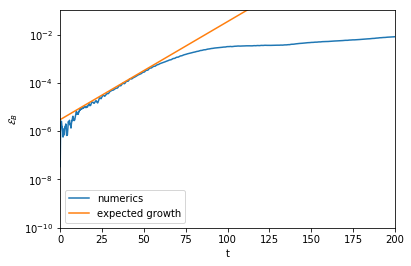

In [12]:
# ... plot magnetic energy
f1 = plt.figure()

en_tot = en_B + en_E + en_C + en_H 

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt, Nt + 1)

plt.semilogy(tn, en_B/en_tot[0], label = 'numerics')
plt.ylim((1e-10, 1e-1))
plt.xlim((0, 200))

omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

t2 = np.linspace(0, 150, 100) 
plt.semilogy(t2, 3e-6*np.exp(gamma*2*t2), label = 'expected growth')
plt.xlabel('t')
plt.ylabel('$\mathcal{E}_B$')
plt.legend()
# ...

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

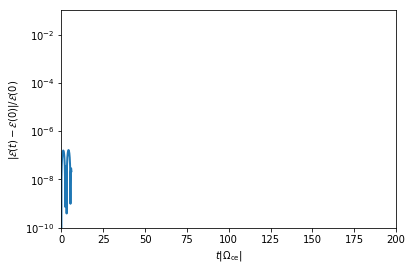

In [7]:
# ... plot energy conservation
f2 = plt.figure()

en_tot = en_B + en_E + en_C + en_H

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt, Nt + 1)

plt.semilogy(tn, np.abs(en_tot - en_tot[0])/(en_tot[0]), linewidth = 2)
plt.xlim((0, 200))
plt.ylim((1e-10, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
# ...

Start to prepare animation!
Number of frames: 50
Frames finished: 0



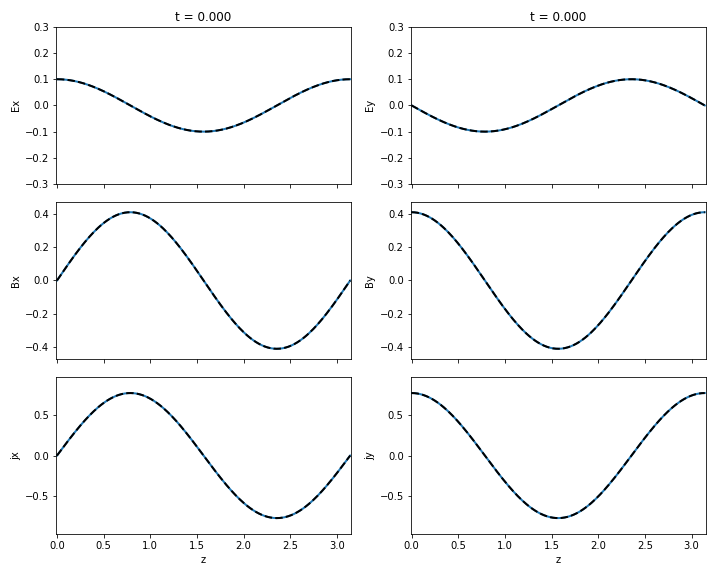
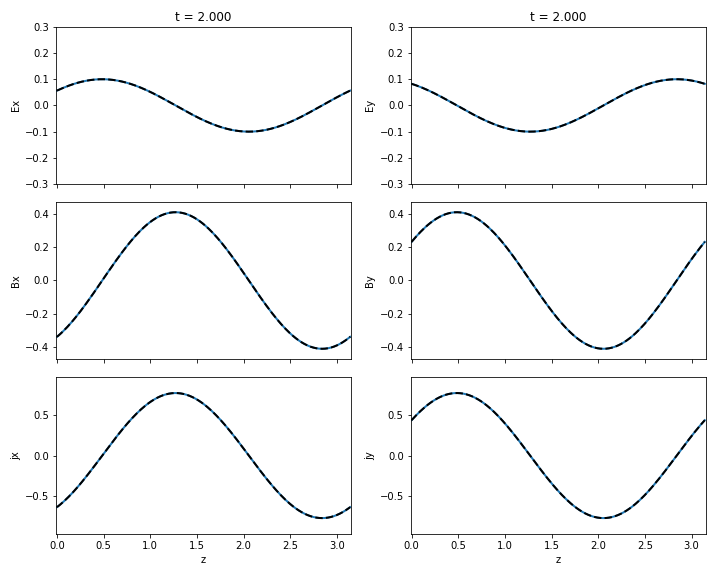
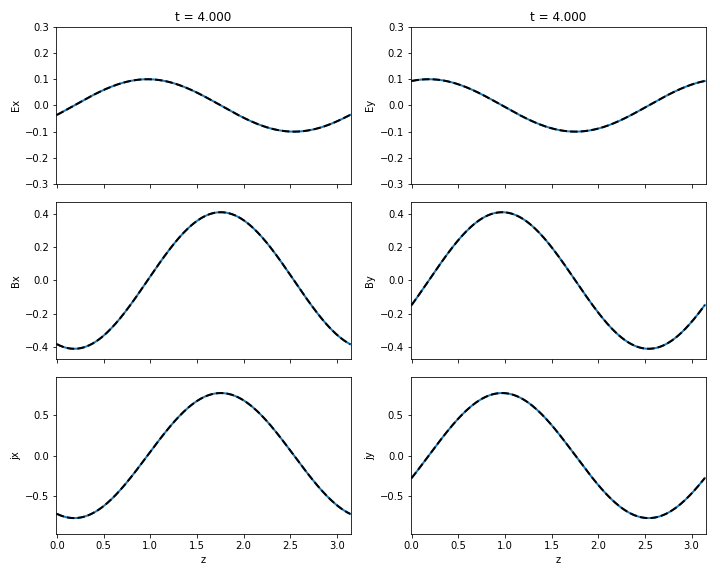
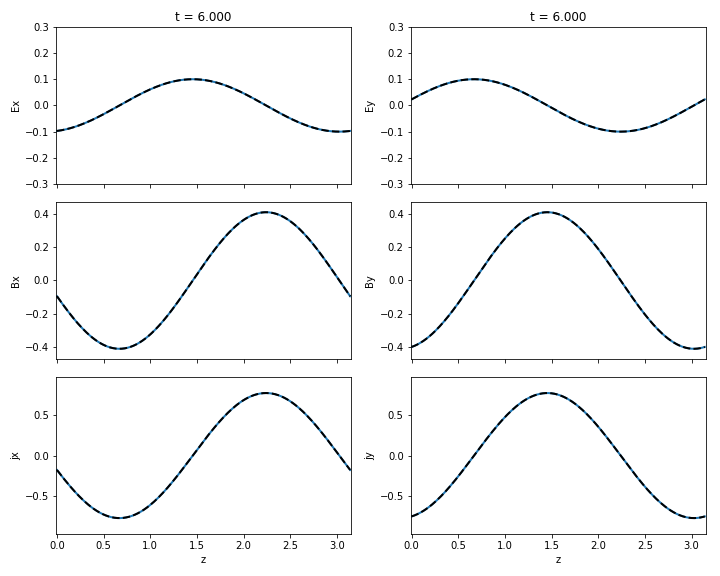
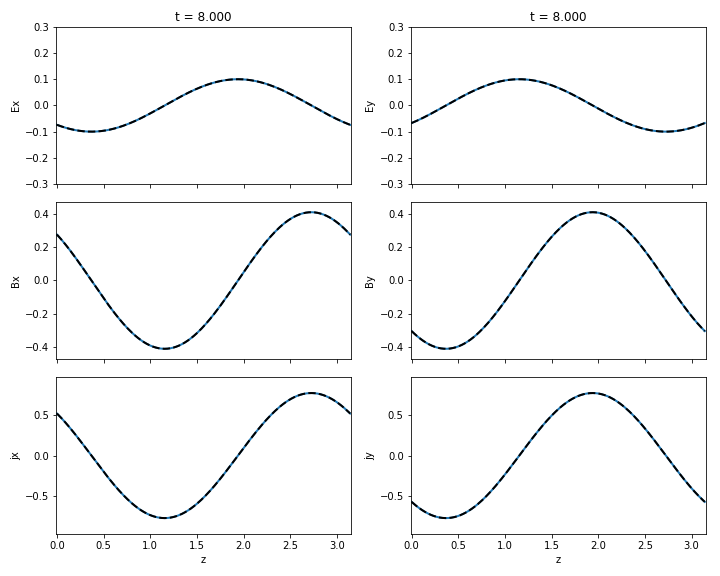
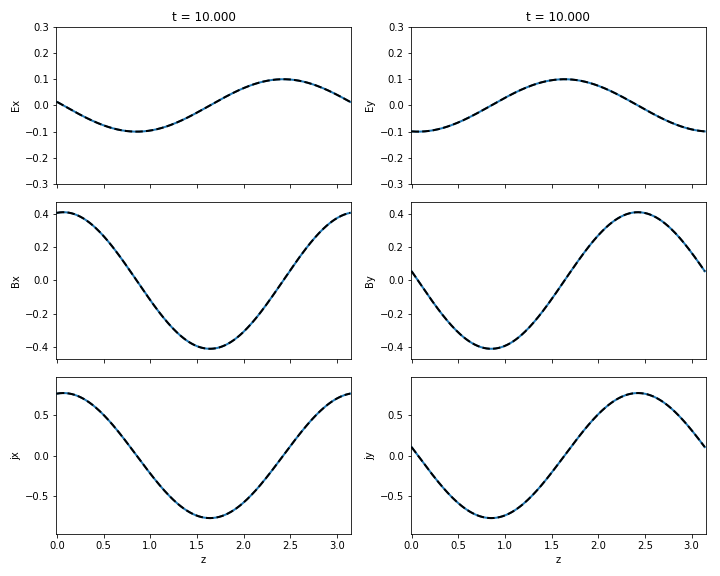
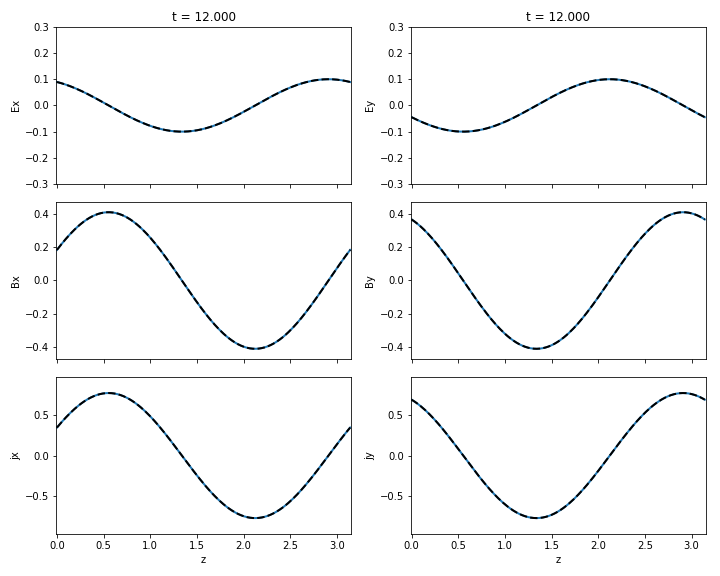
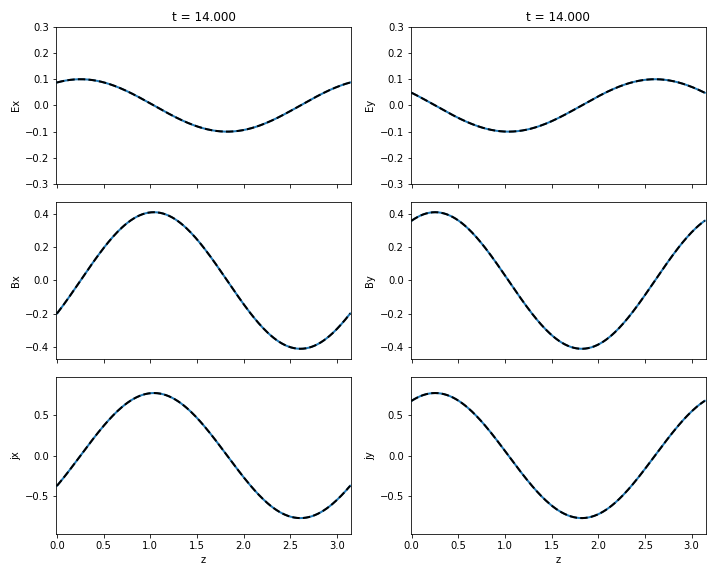
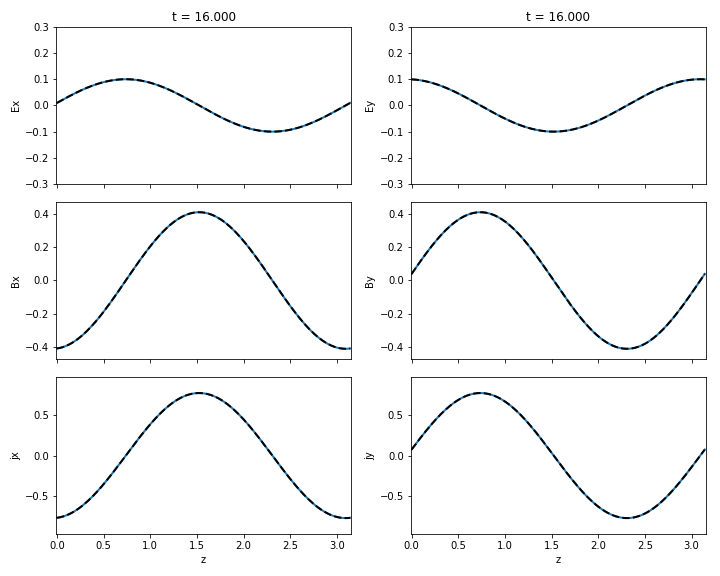
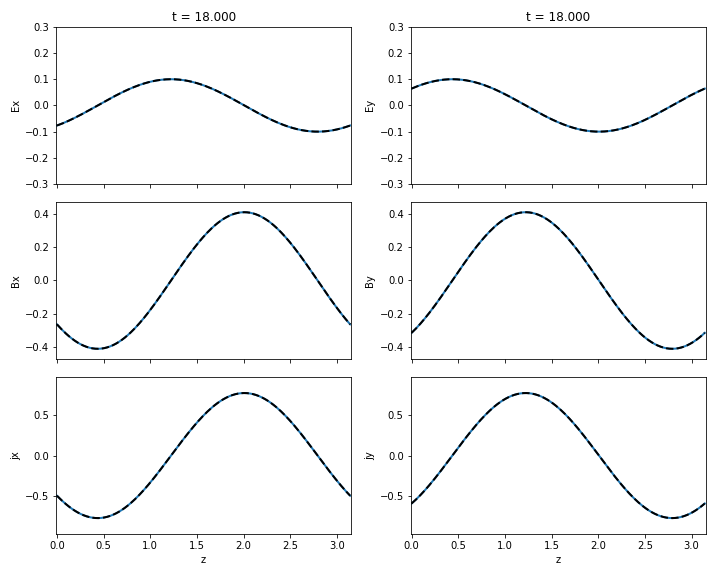
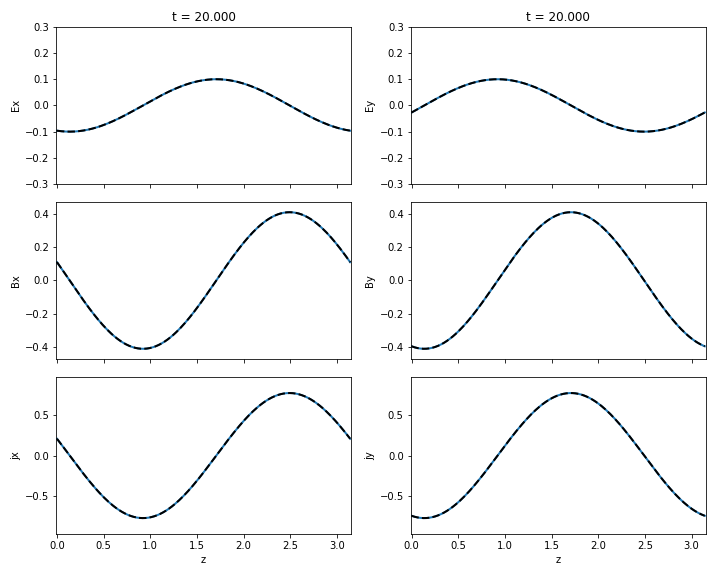
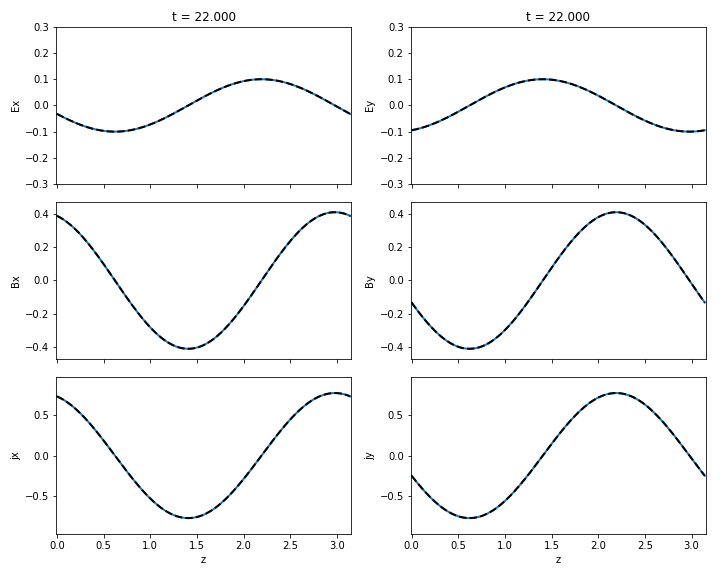
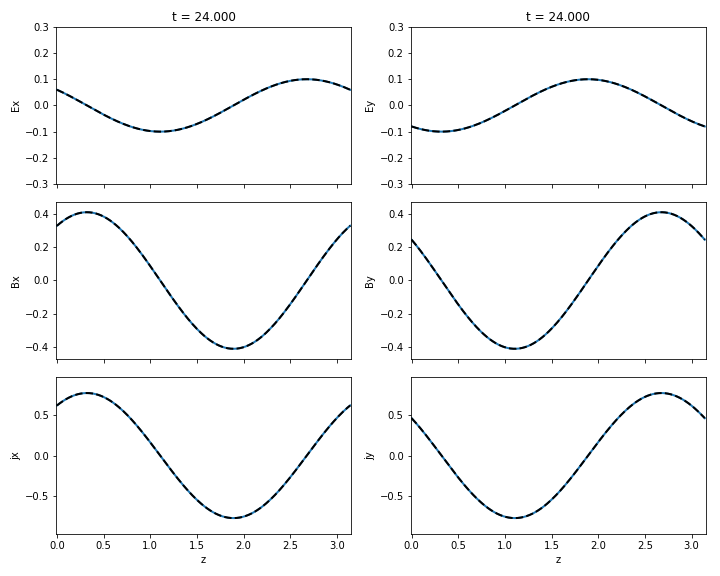
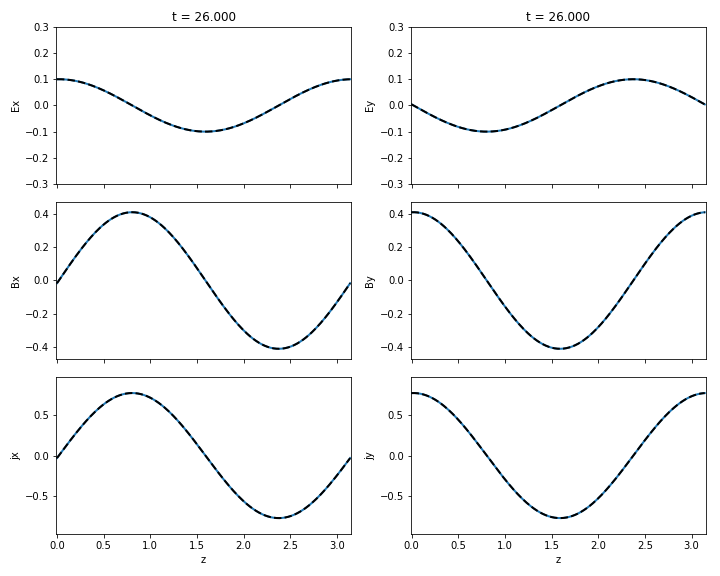
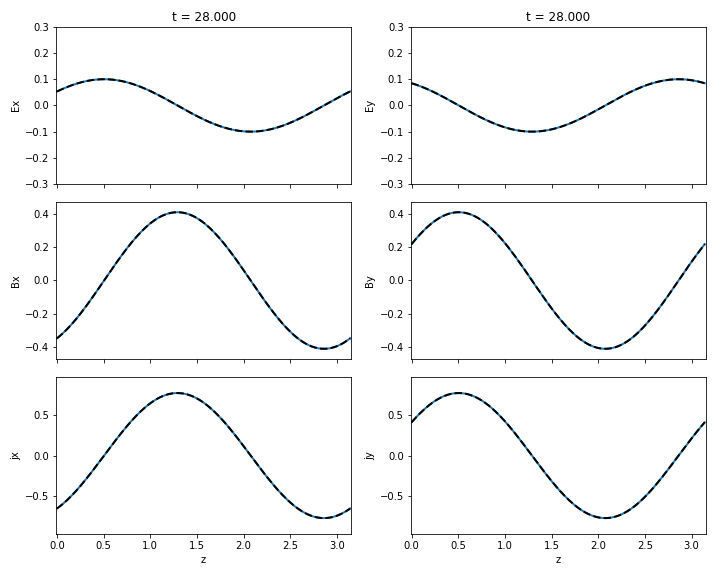
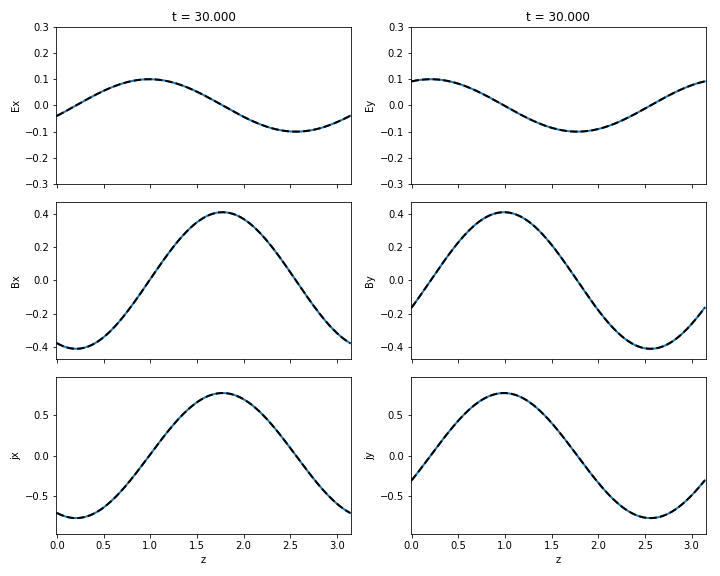
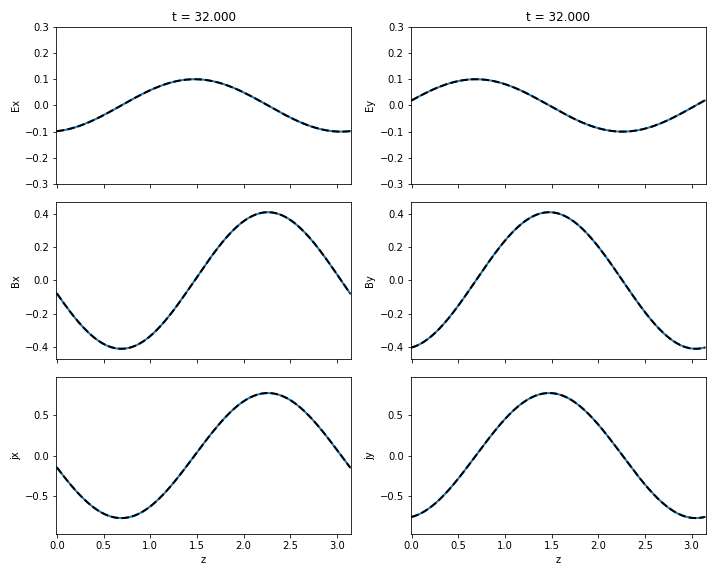
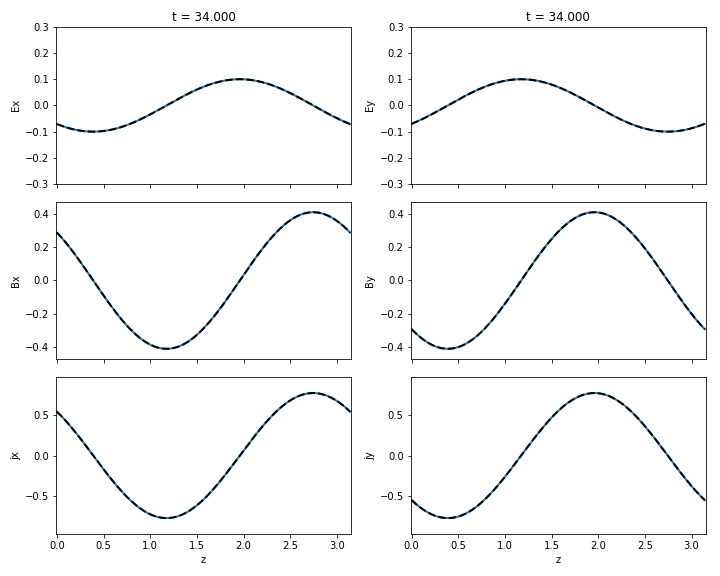
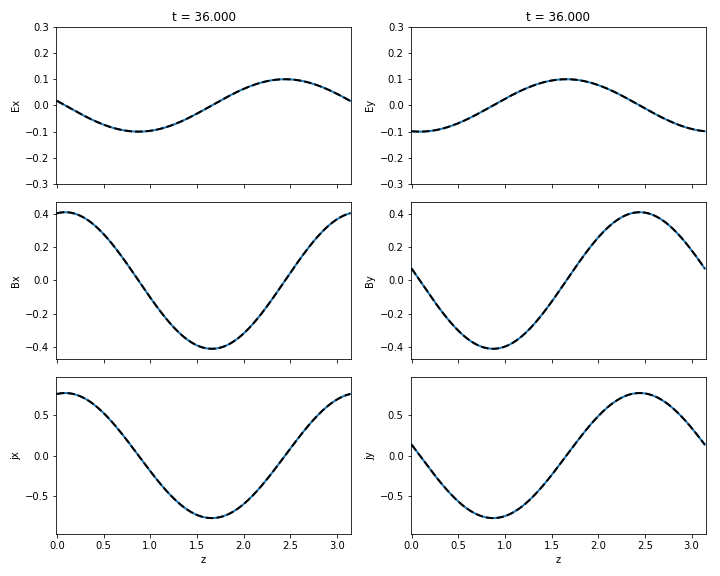
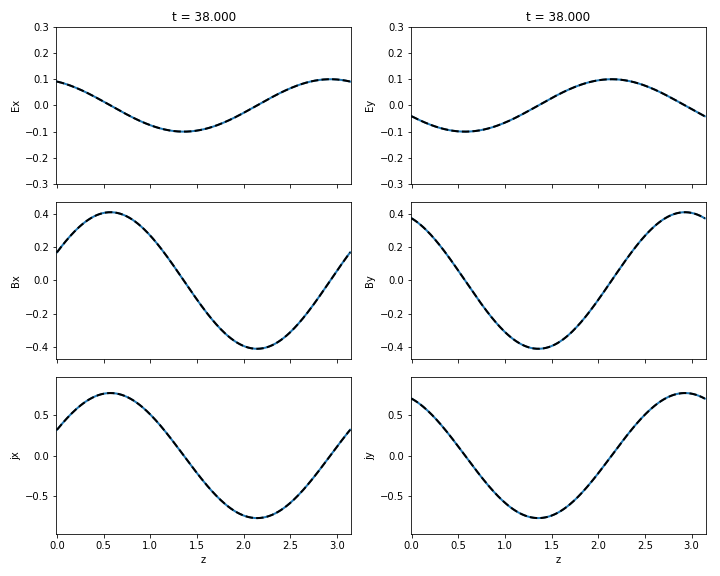
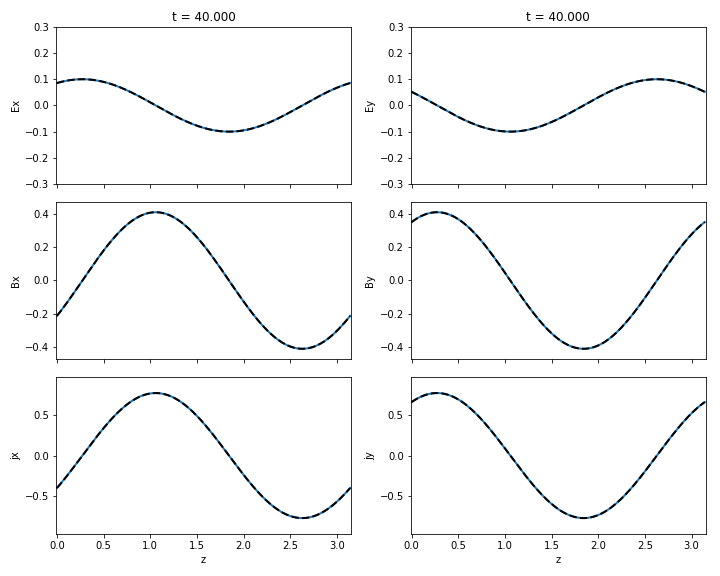
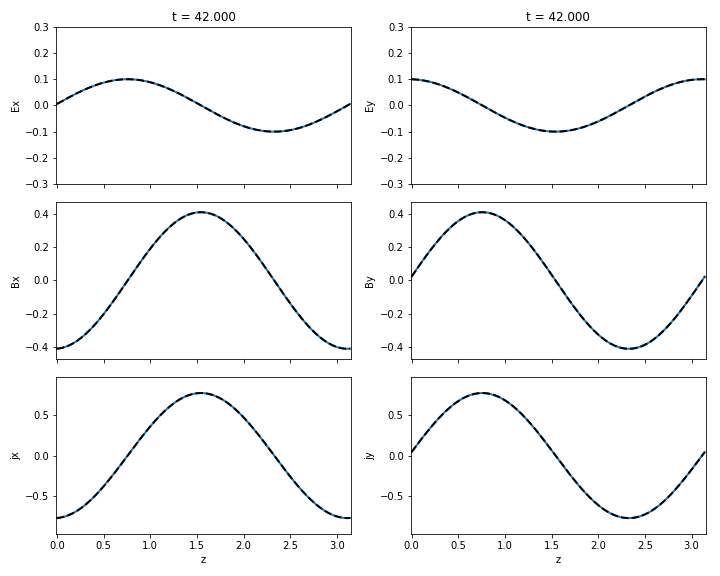
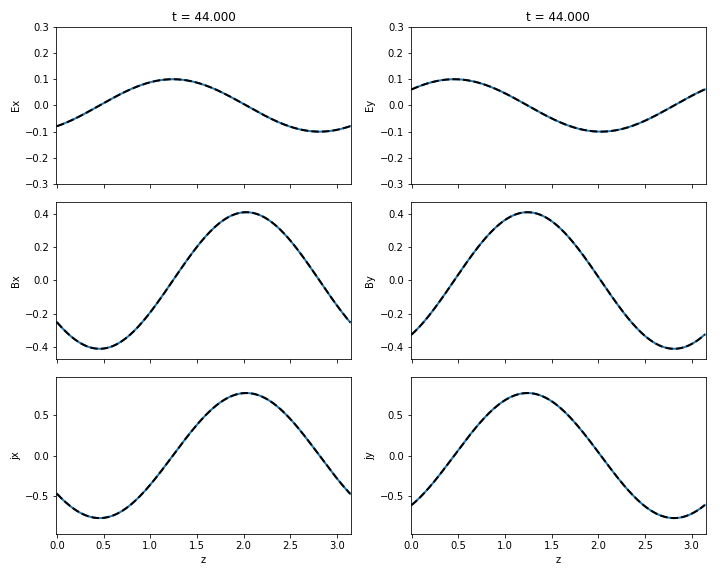
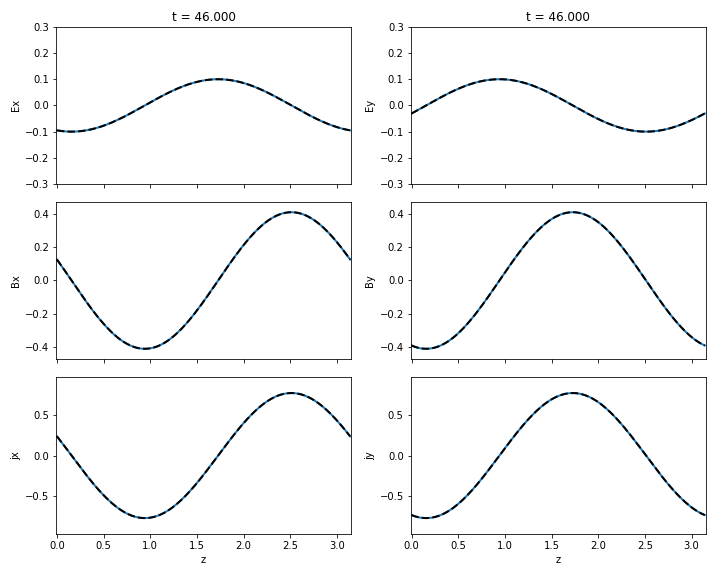
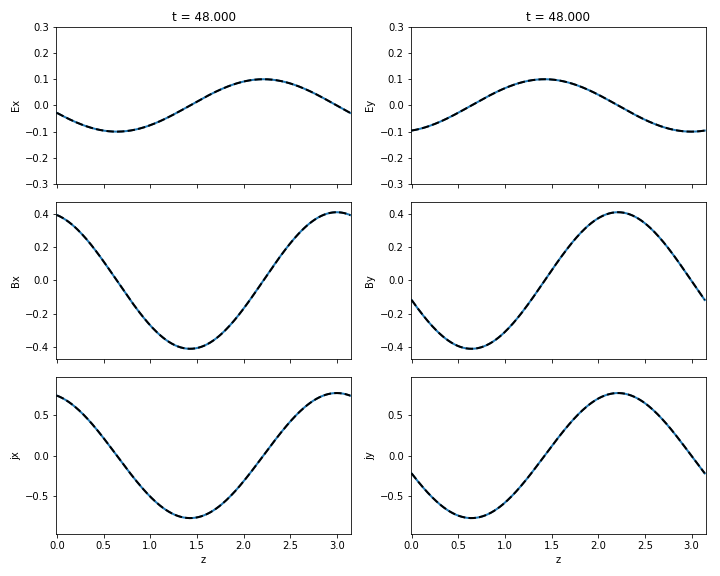
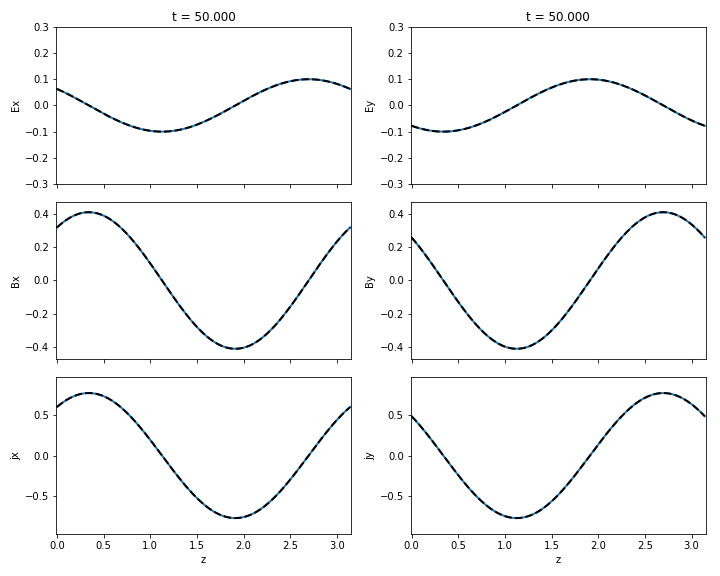
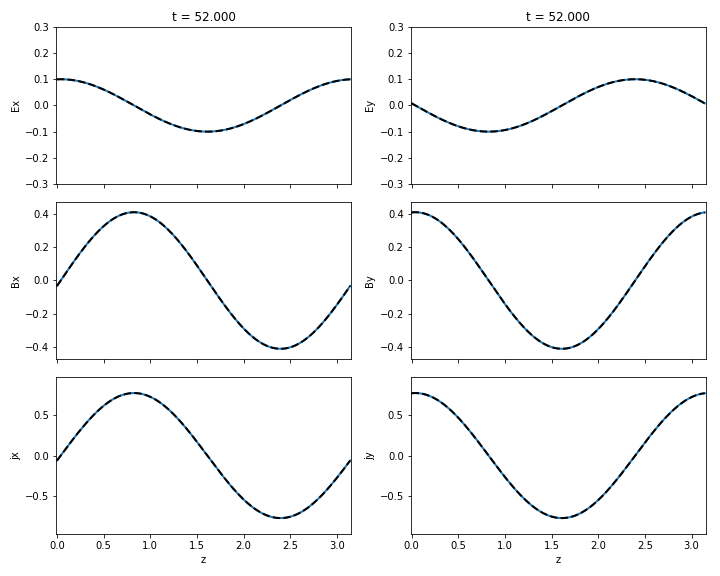
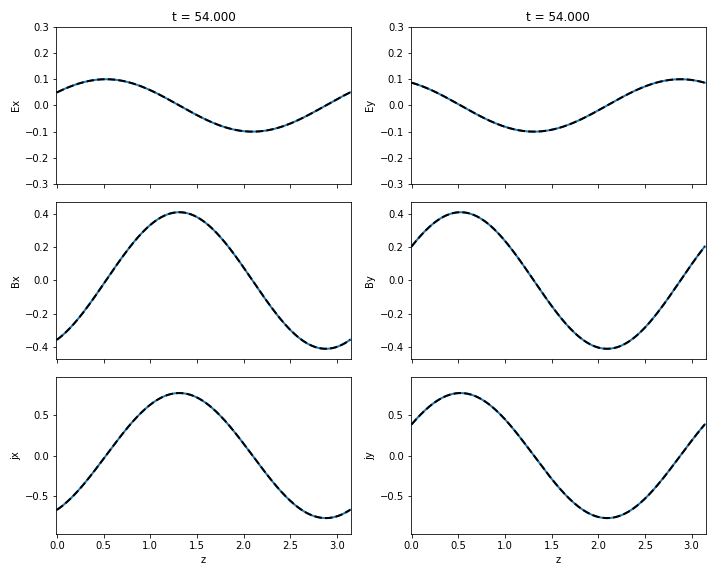
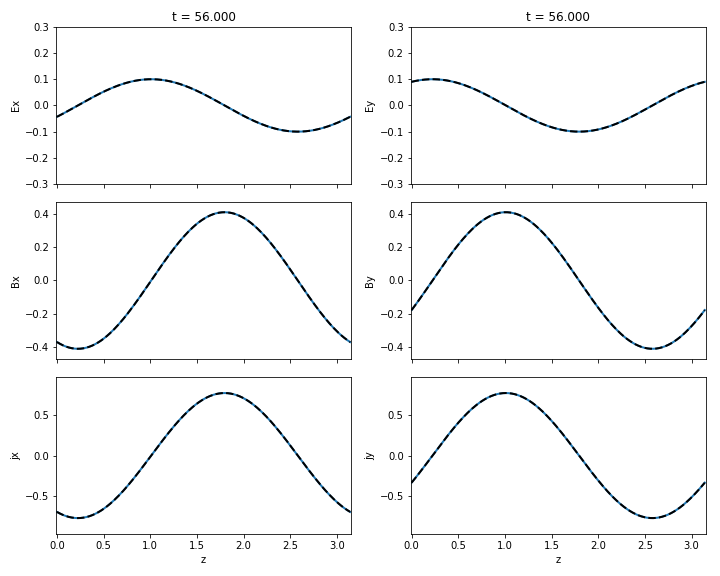
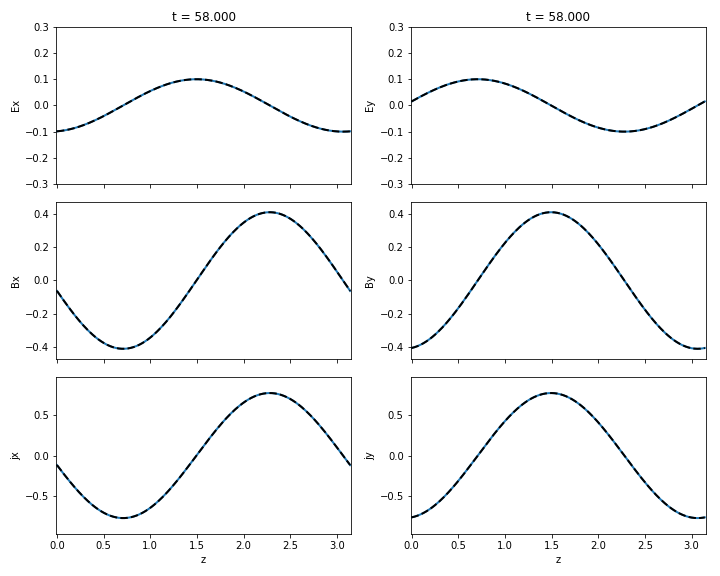
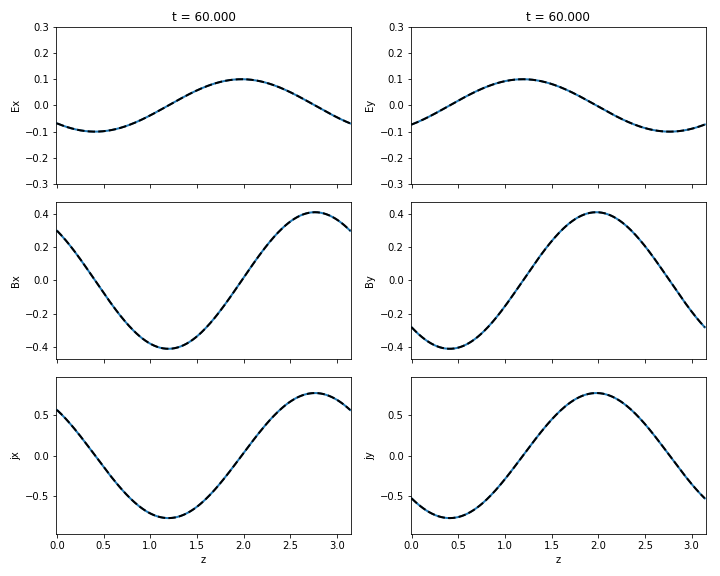
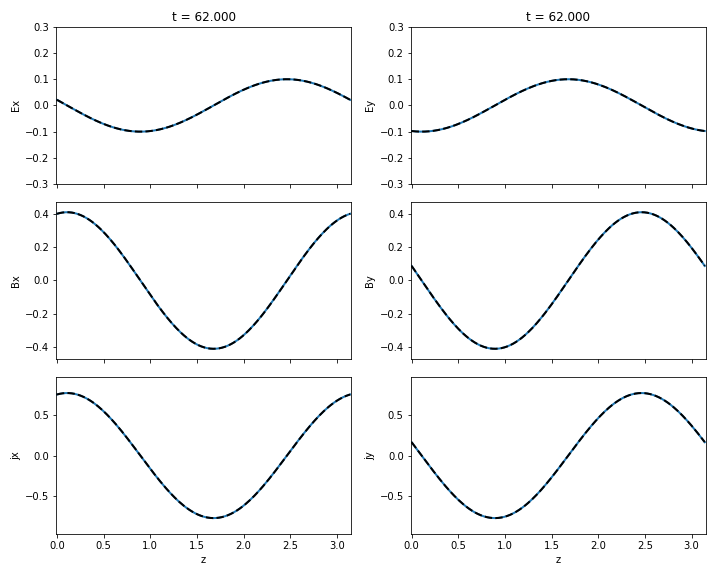
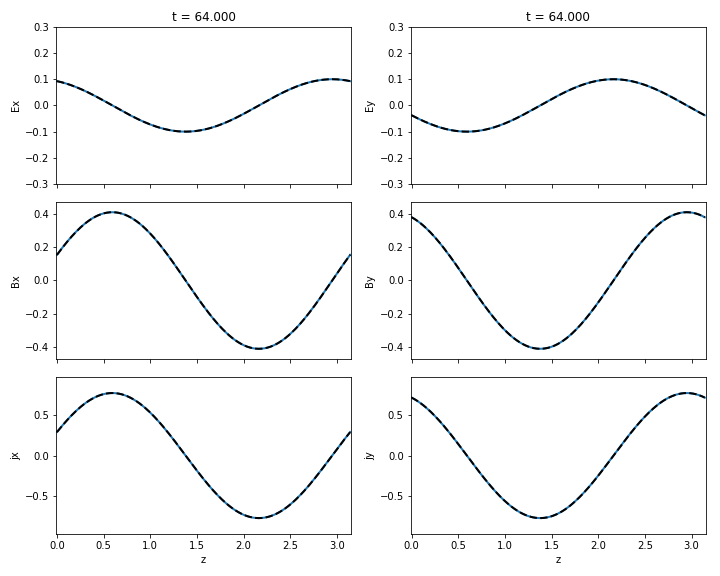
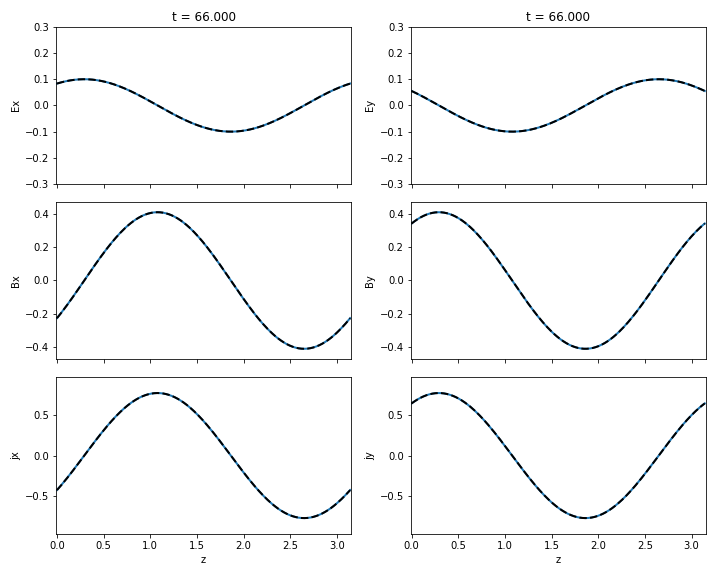
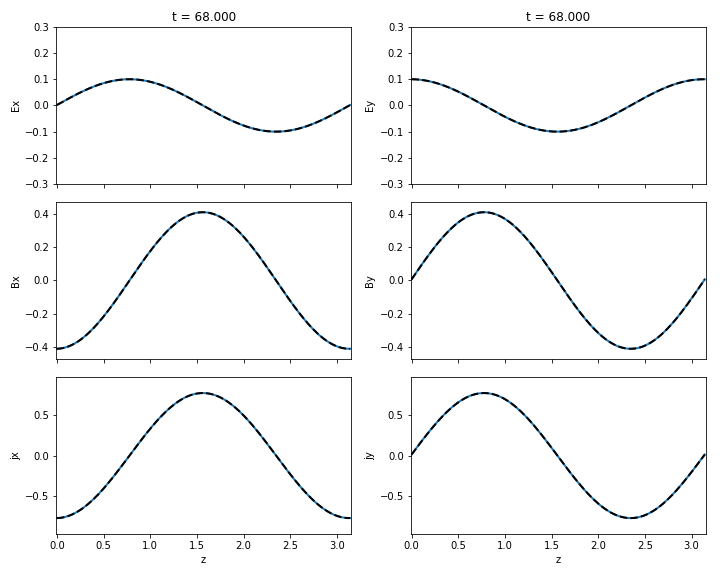
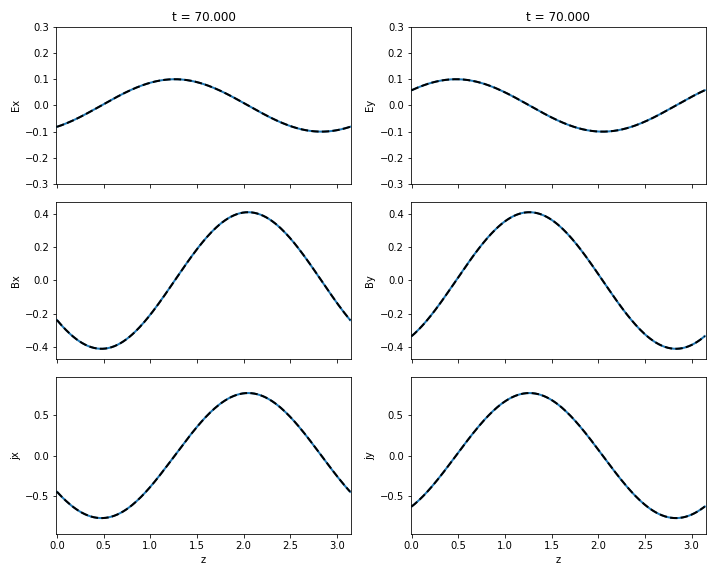
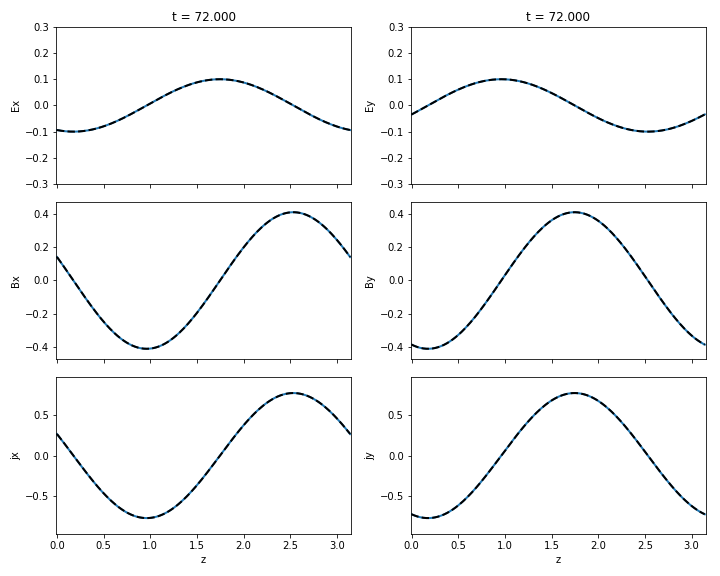
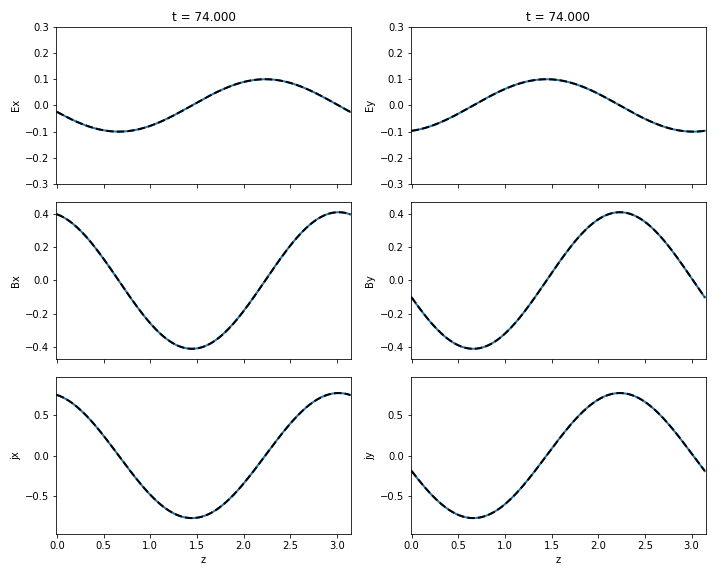
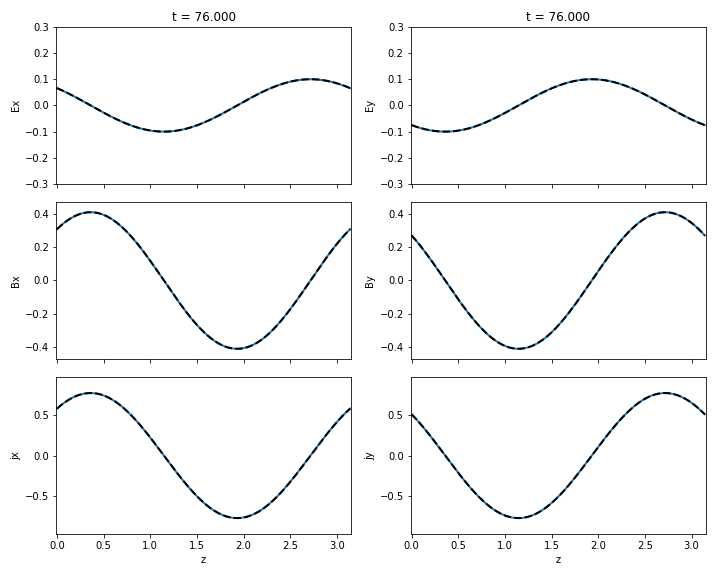
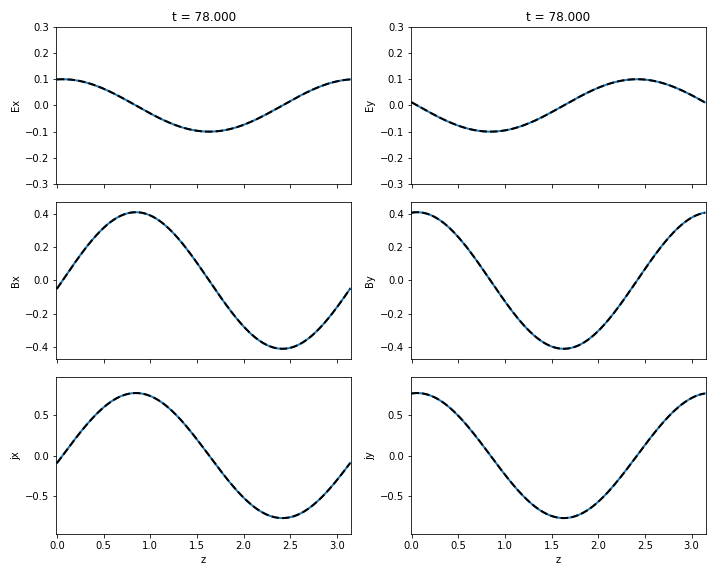
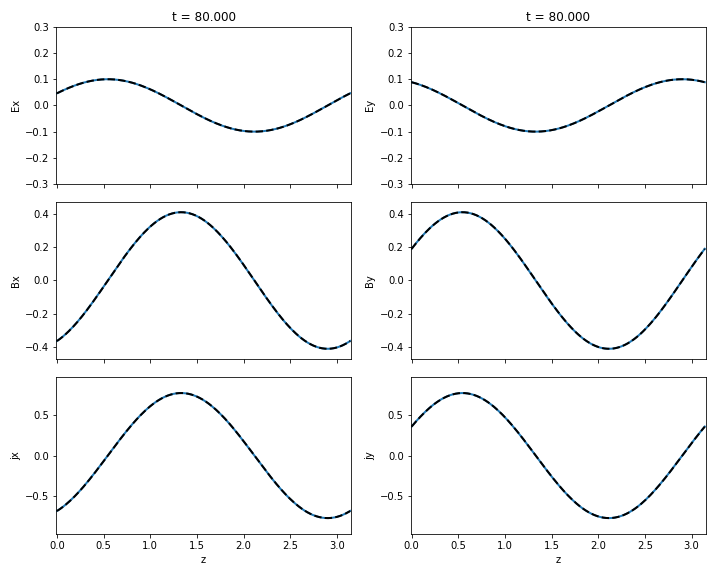
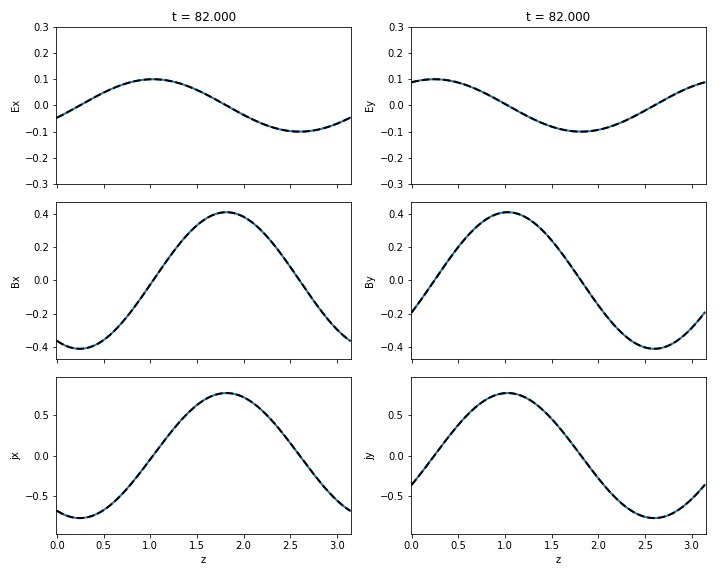
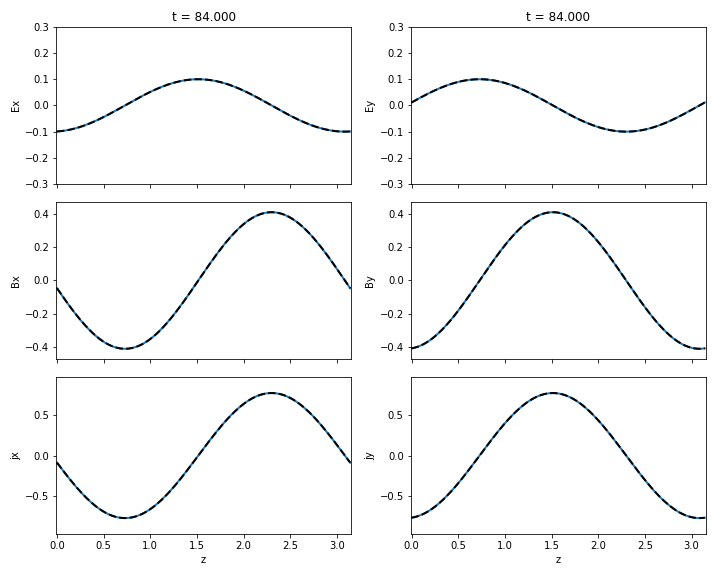
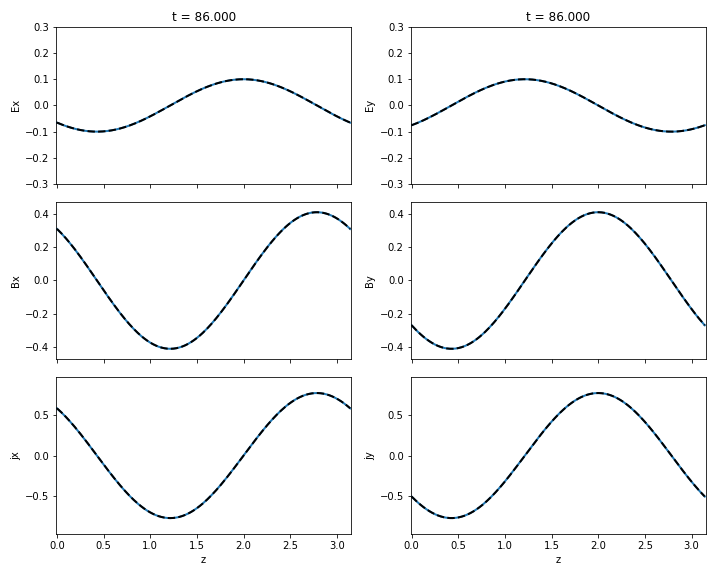
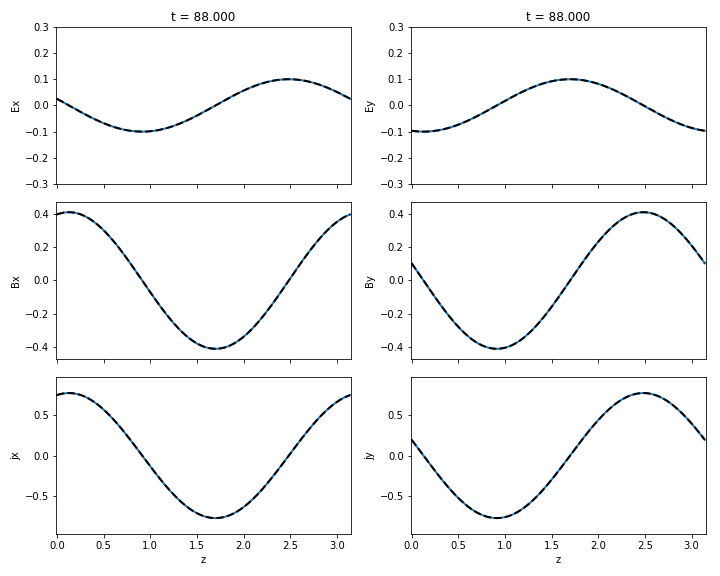
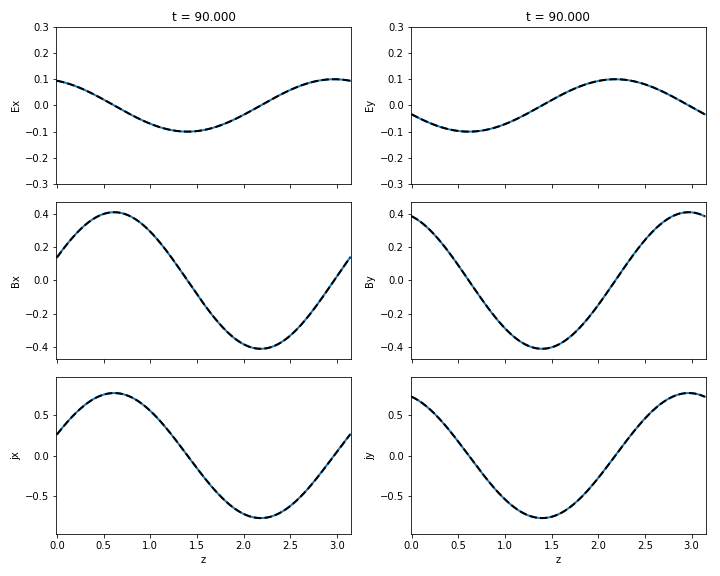
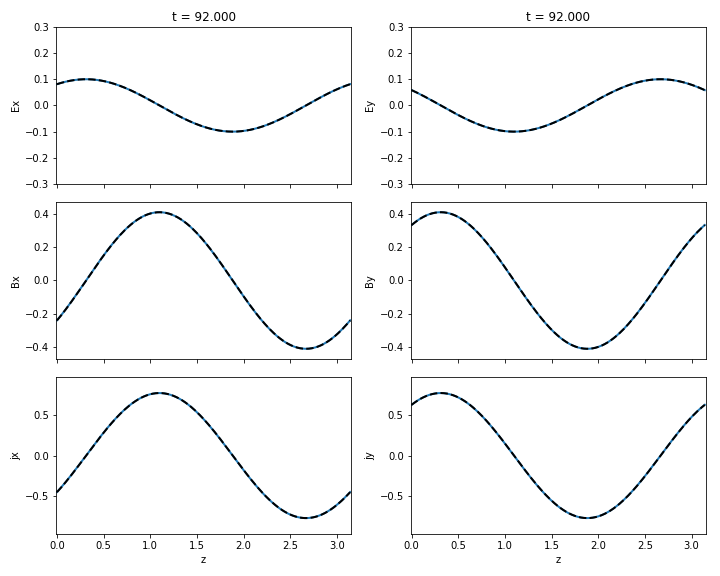
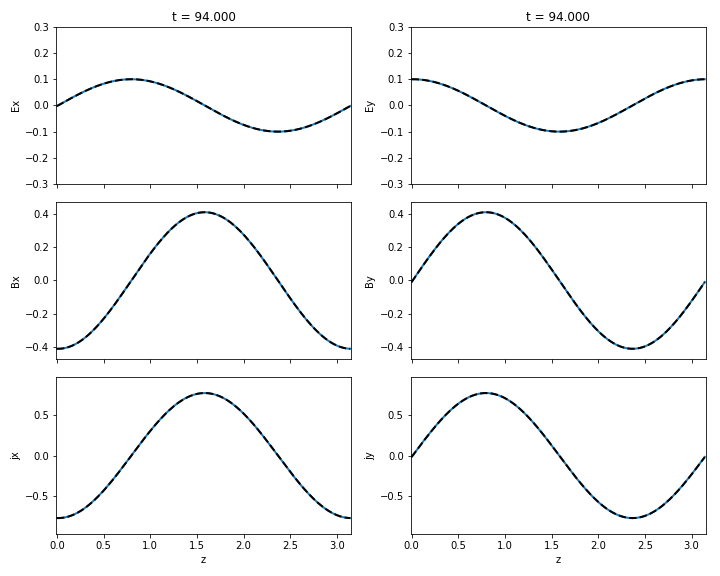
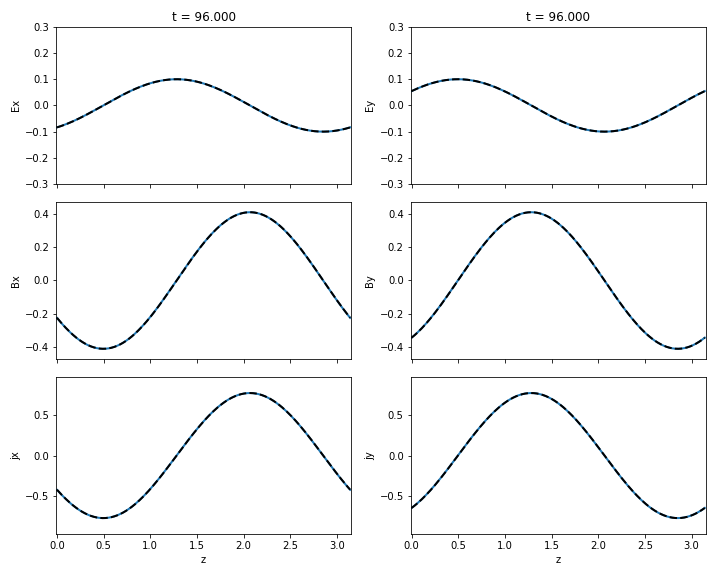
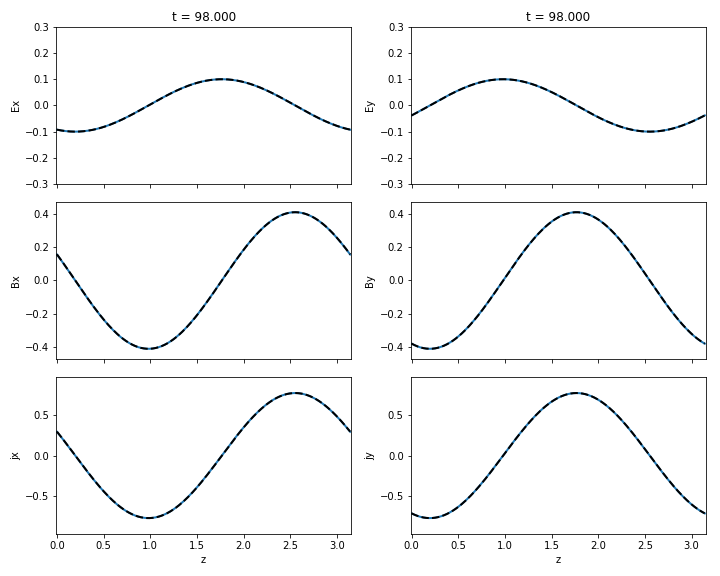

In [9]:
ex_n = u[:, 0:Nbase_0]
ey_n = u[:, Nbase_0:2*Nbase_0]
bx_n = u[:, 2*Nbase_0:3*Nbase_0]
by_n = u[:, 3*Nbase_0:4*Nbase_0]
yx_n = u[:, 4*Nbase_0:5*Nbase_0]
yy_n = u[:, 5*Nbase_0:]

'''
ex_n = ex
ey_n = ey
bx_n = bx
by_n = by
yx_n = yx
yy_n = yy
'''


from JSAnimation import IPython_display
from matplotlib import animation

fr = 40
    
print('Start to prepare animation!')
print('Number of frames: ' + str(int(counter/fr)))

f2, ((a1, a2), (a3, a4), (a5, a6)) = plt.subplots(3, 2, sharex = 'col')
f2.set_figheight(8)
f2.set_figwidth(10)

a1.set_title('t = 0.000')
a2.set_title('t = 0.000')


a1.set_xlim((0 - 0.01, Lz + 0.01))
a2.set_xlim((0 - 0.01, Lz + 0.01))
a3.set_xlim((0 - 0.01, Lz + 0.01))
a4.set_xlim((0 - 0.01, Lz + 0.01))
a5.set_xlim((0 - 0.01, Lz + 0.01))
a6.set_xlim((0 - 0.01, Lz + 0.01))

a1.set_ylim((np.min(ex_n) - 0.2, np.max(ex_n) + 0.2))
a2.set_ylim((np.min(ey_n) - 0.2, np.max(ey_n) + 0.2))
a3.set_ylim((np.min(bx_n) - 0.2, np.max(bx_n) + 0.2))
a4.set_ylim((np.min(by_n) - 0.2, np.max(by_n) + 0.2))
a5.set_ylim((np.min(yx_n) - 0.2, np.max(yx_n) + 0.2))
a6.set_ylim((np.min(yy_n) - 0.2, np.max(yy_n) + 0.2))


a1.set_ylabel('Ex')
a2.set_ylabel('Ey')
a3.set_ylabel('Bx')
a4.set_ylabel('By')
a5.set_ylabel('jx')
a6.set_ylabel('jy')




line1, = a1.plot([],[], lw = 2)
line2, = a2.plot([],[], lw = 2)
line3, = a3.plot([],[], lw = 2)
line4, = a4.plot([],[], lw = 2)
line5, = a5.plot([],[], lw = 2)
line6, = a6.plot([],[], lw = 2)
line1ana, = a1.plot([],[], 'k--', lw = 2)
line2ana, = a2.plot([],[], 'k--', lw = 2)
line3ana, = a3.plot([],[], 'k--', lw = 2)
line4ana, = a4.plot([],[], 'k--', lw = 2)
line5ana, = a5.plot([],[], 'k--', lw = 2)
line6ana, = a6.plot([],[], 'k--', lw = 2)


a5.set_xlabel('z')
a6.set_xlabel('z')


plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
plt.tight_layout()

def init():  

    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    line1ana.set_data([], [])
    line2ana.set_data([], [])
    line3ana.set_data([], [])
    line4ana.set_data([], [])
    line5ana.set_data([], [])
    line6ana.set_data([], [])

    return line1,




def animate(i):
    
    ti = int(fr*i)

    if i%50 == 0:
        print('Frames finished: ' + str(i))

    fun_Ex_ani = fem.lag_fun(ex_n[ti], shapefun.eta, el_b, basis = 1, bcs = 1)[2] 
    fun_Ey_ani = fem.lag_fun(ey_n[ti], shapefun.eta, el_b, basis = 1, bcs = 1)[2] 
    fun_Bx_ani = fem.lag_fun(bx_n[ti], shapefun.chi, el_b, basis = 2, bcs = 1)[2] 
    fun_By_ani = fem.lag_fun(by_n[ti], shapefun.chi, el_b, basis = 2, bcs = 1)[2]
    fun_jx_ani = fem.lag_fun(yx_n[ti], shapefun.eta, el_b, basis = 1, bcs = 1)[2] 
    fun_jy_ani = fem.lag_fun(yy_n[ti], shapefun.eta, el_b, basis = 1, bcs = 1)[2] 
    
    line1.set_data(z_plot, fun_Ex_ani(z_plot))
    line2.set_data(z_plot, fun_Ey_ani(z_plot))
    line3.set_data(z_plot, fun_Bx_ani(z_plot))
    line4.set_data(z_plot, fun_By_ani(z_plot))
    line5.set_data(z_plot, fun_jx_ani(z_plot))
    line6.set_data(z_plot, fun_jy_ani(z_plot))
    
    line1ana.set_data(z_plot, Ex0(z_plot, tn[ti]))
    line2ana.set_data(z_plot, Ey0(z_plot, tn[ti]))
    line3ana.set_data(z_plot, Bx0(z_plot, tn[ti]))
    line4ana.set_data(z_plot, By0(z_plot, tn[ti]))
    line5ana.set_data(z_plot, jx0(z_plot, tn[ti]))
    line6ana.set_data(z_plot, jy0(z_plot, tn[ti]))
    
    a1.set_title('t = '+'%.3f' % tn[ti])
    a2.set_title('t = '+'%.3f' % tn[ti])
   

    return line1,

animation.FuncAnimation(f2, animate, init_func = init, frames = int(counter/fr), interval = 50, blit = True)